In [2]:
import networkx as nx

In [4]:
from google.colab import files
uploaded = files.upload()

Saving B2B_Graph.txt to B2B_Graph.txt


In [5]:
with open('B2B_Graph.txt') as f :
  G = nx.read_edgelist (f)

In [6]:
nx.info(G)

'Graph with 1006 nodes and 3830 edges'

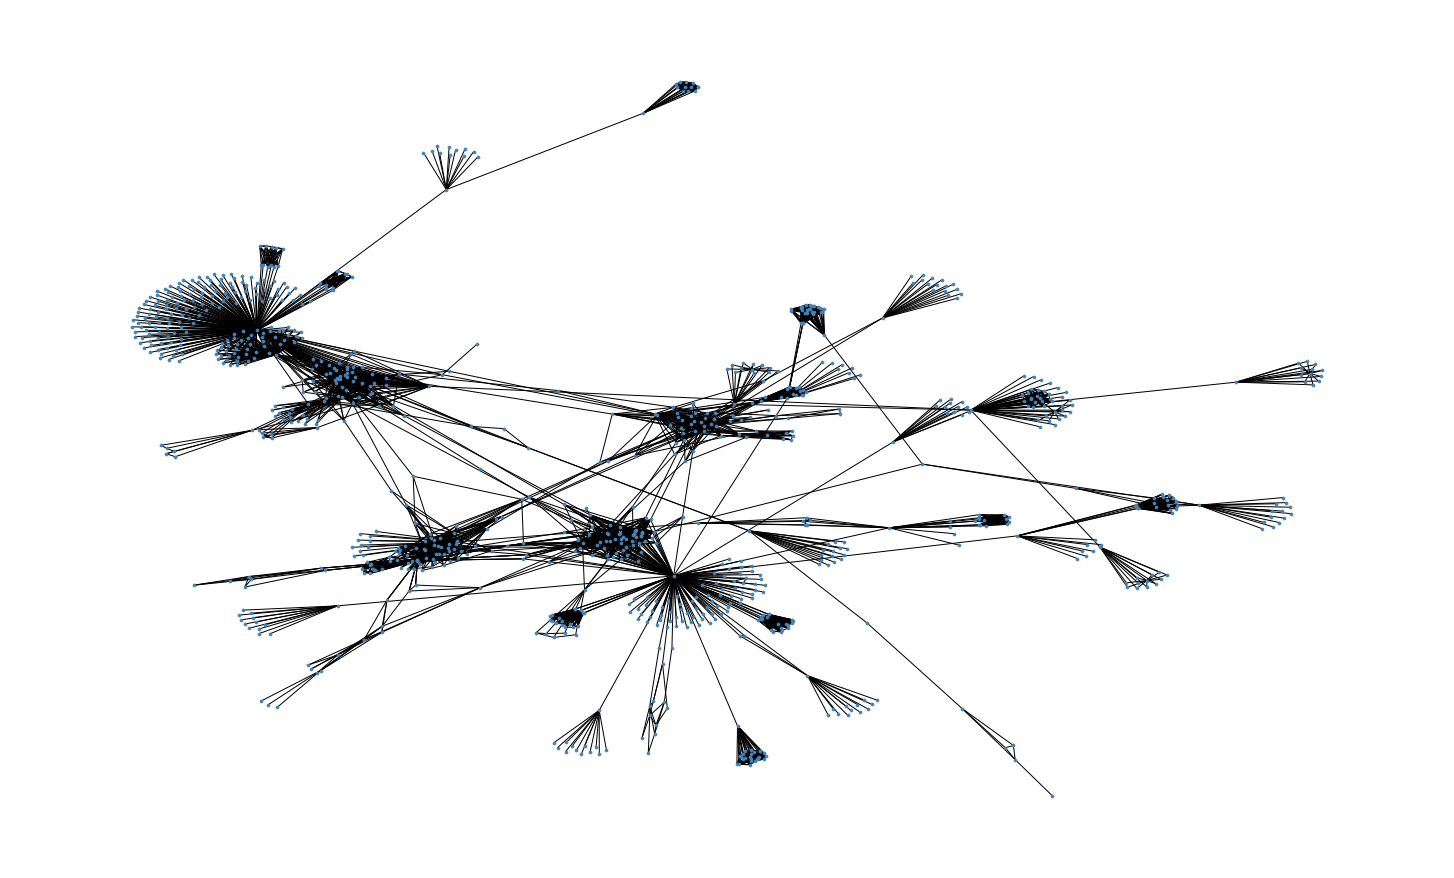

In [81]:
nx.draw (G, node_size = 10, node_color = 'steelblue')

# **رسم گراف با استفاده از الگوریتم Spring Layout**

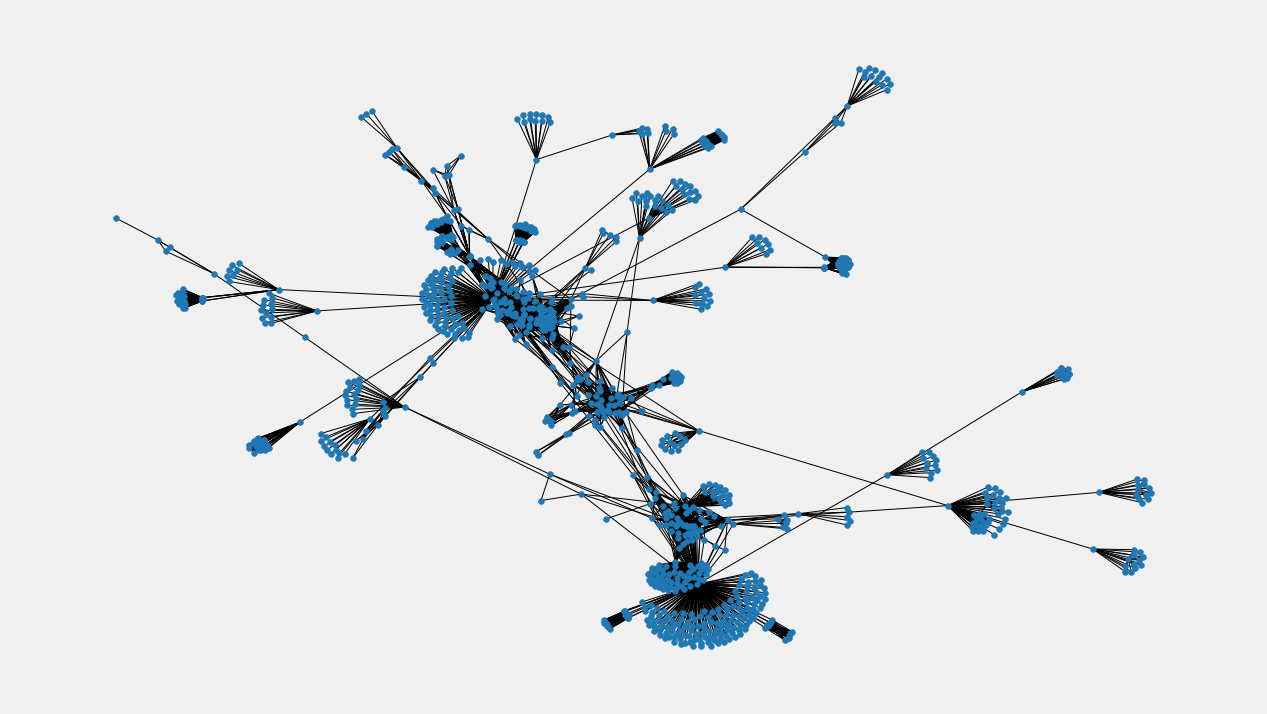

In [31]:
pos = nx.spring_layout(G)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 12)
plt.axis('off')
nx.draw_networkx(G, pos, with_labels = False, node_size = 35)
plt.show()

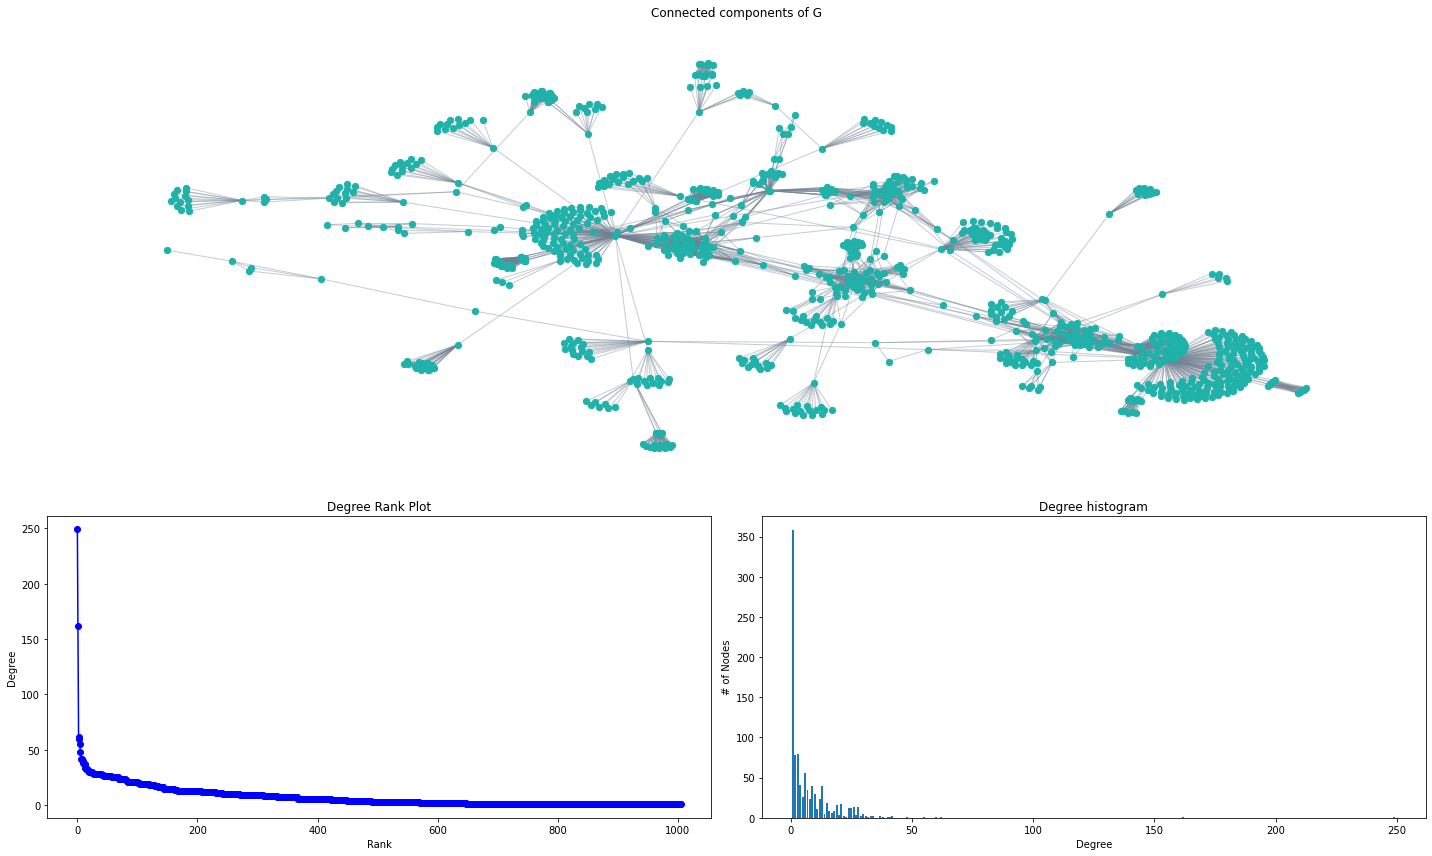

In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#G = nx.gnp_random_graph(100, 0.02, seed=10374196)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(20,12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, node_color='lightseagreen', ax=ax0, node_size=40)
nx.draw_networkx_edges(Gcc, pos, edge_color='slategrey', ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [25]:
sorted_degree_dict = sorted( dict( G.degree()).items()  , key = lambda x : x[1] , reverse=True )
sorted_degree_dict [:10]

[('221', 249),
 ('33', 162),
 ('223', 62),
 ('227', 60),
 ('226', 55),
 ('63', 48),
 ('18', 42),
 ('202', 42),
 ('47', 41),
 ('38', 40)]

# **مرکزیت درجه ای**

In [23]:
nx.degree_centrality (G)
sorted_degree_centrality = sorted ( nx.degree_centrality(G).items() , key = lambda x : x[1] , reverse=True)
sorted_degree_centrality [:10]

[('221', 0.24653465346534653),
 ('33', 0.1603960396039604),
 ('223', 0.061386138613861385),
 ('227', 0.0594059405940594),
 ('226', 0.054455445544554455),
 ('63', 0.047524752475247525),
 ('18', 0.041584158415841586),
 ('202', 0.041584158415841586),
 ('47', 0.040594059405940595),
 ('38', 0.039603960396039604)]

(array([949.,  52.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([  1. ,  25.8,  50.6,  75.4, 100.2, 125. , 149.8, 174.6, 199.4,
        224.2, 249. ]),
 <a list of 10 Patch objects>)

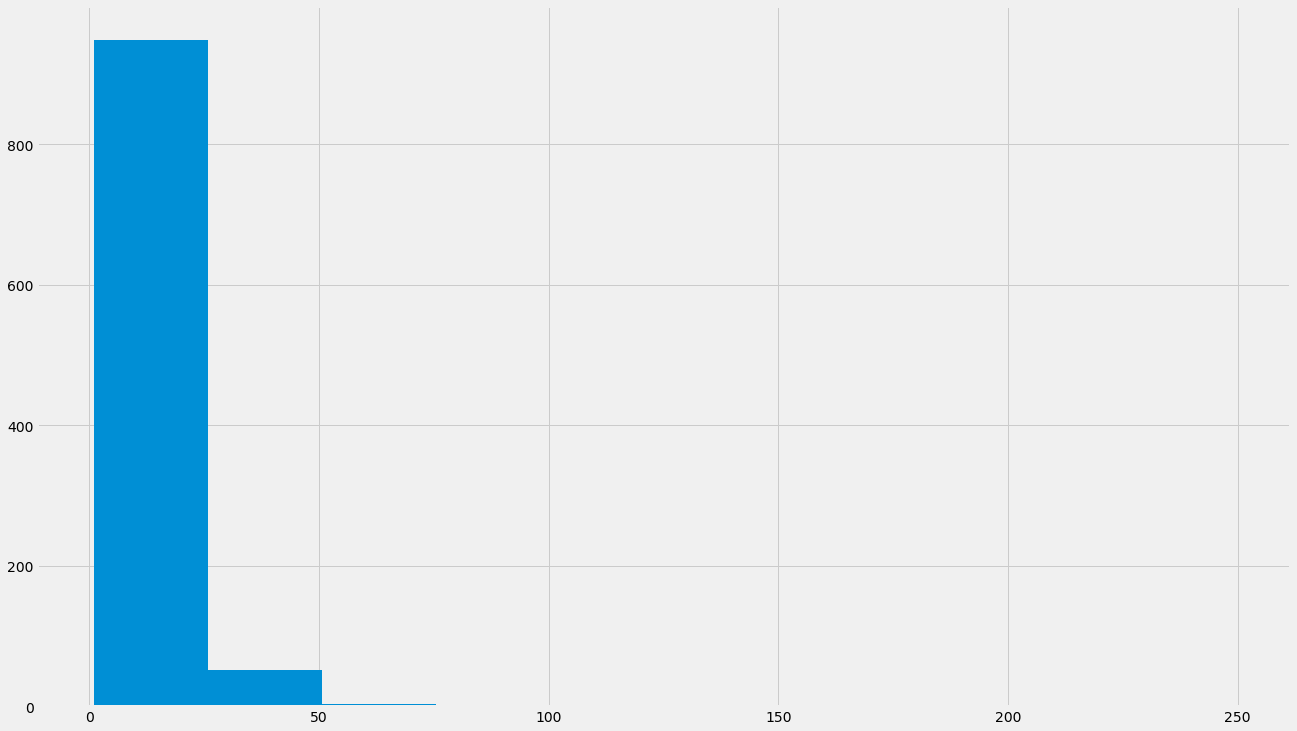

In [49]:
import matplotlib.pyplot as plt
plt.hist (dict( G.degree()).values() )

# **مرکزیت نزدیکی**

In [24]:
nx.closeness_centrality (G)
sorted_clossness_centrality = sorted ( nx.closeness_centrality(G).items() , key = lambda x : x[1] , reverse=True)
sorted_clossness_centrality [:10]

[('33', 0.3118256166121757),
 ('223', 0.3077946298785003),
 ('35', 0.3046998027042192),
 ('221', 0.2965672456925408),
 ('42', 0.29473172781469126),
 ('57', 0.29395201424904394),
 ('193', 0.2881915713185151),
 ('183', 0.28719837808019744),
 ('38', 0.2858030158546006),
 ('47', 0.2821740272221353)]

(array([  5.,   0.,   0.,   4.,  25., 195., 290., 408.,  72.,  12.]),
 array([0.0019802 , 0.03296474, 0.06394928, 0.09493382, 0.12591837,
        0.15690291, 0.18788745, 0.21887199, 0.24985653, 0.28084107,
        0.31182562]),
 <a list of 10 Patch objects>)

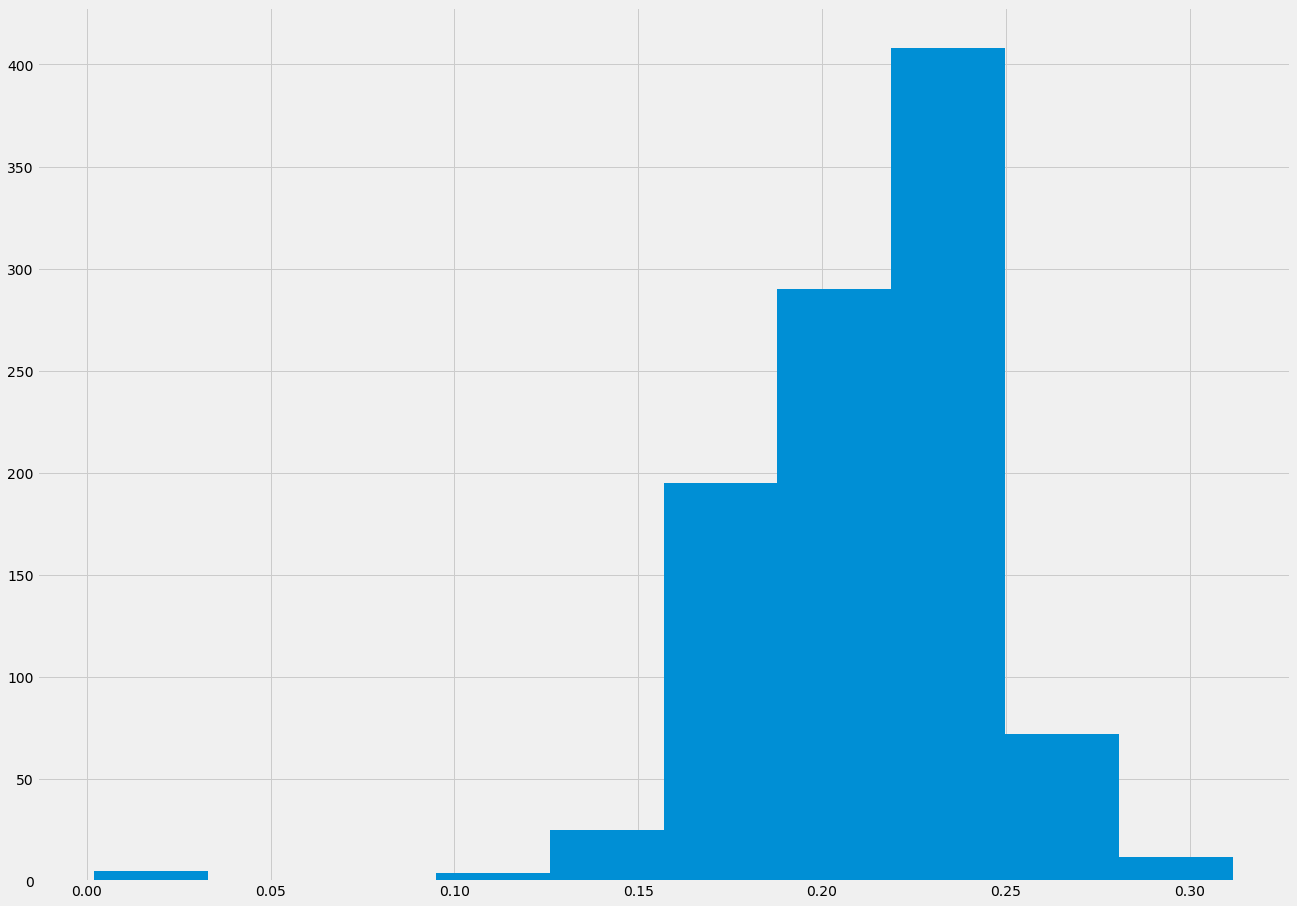

In [69]:
import matplotlib.pyplot as plt
plt.hist (nx.closeness_centrality  (G).values() )

# **مرکزیت ینابینی**

In [22]:
nx.betweenness_centrality (G)
sorted_betweenness_centrality = sorted ( nx.betweenness_centrality(G).items() , key = lambda x : x[1] , reverse=True)
sorted_betweenness_centrality [:5]

[('33', 0.5154827496242761),
 ('221', 0.4138605229997162),
 ('223', 0.19606799371478872),
 ('35', 0.1772464625587787),
 ('202', 0.13078895252958544)]

(array([998.,   7.,   2.,   2.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([0.        , 0.05154827, 0.10309655, 0.15464482, 0.2061931 ,
        0.25774137, 0.30928965, 0.36083792, 0.4123862 , 0.46393447,
        0.51548275]),
 <a list of 10 Patch objects>)

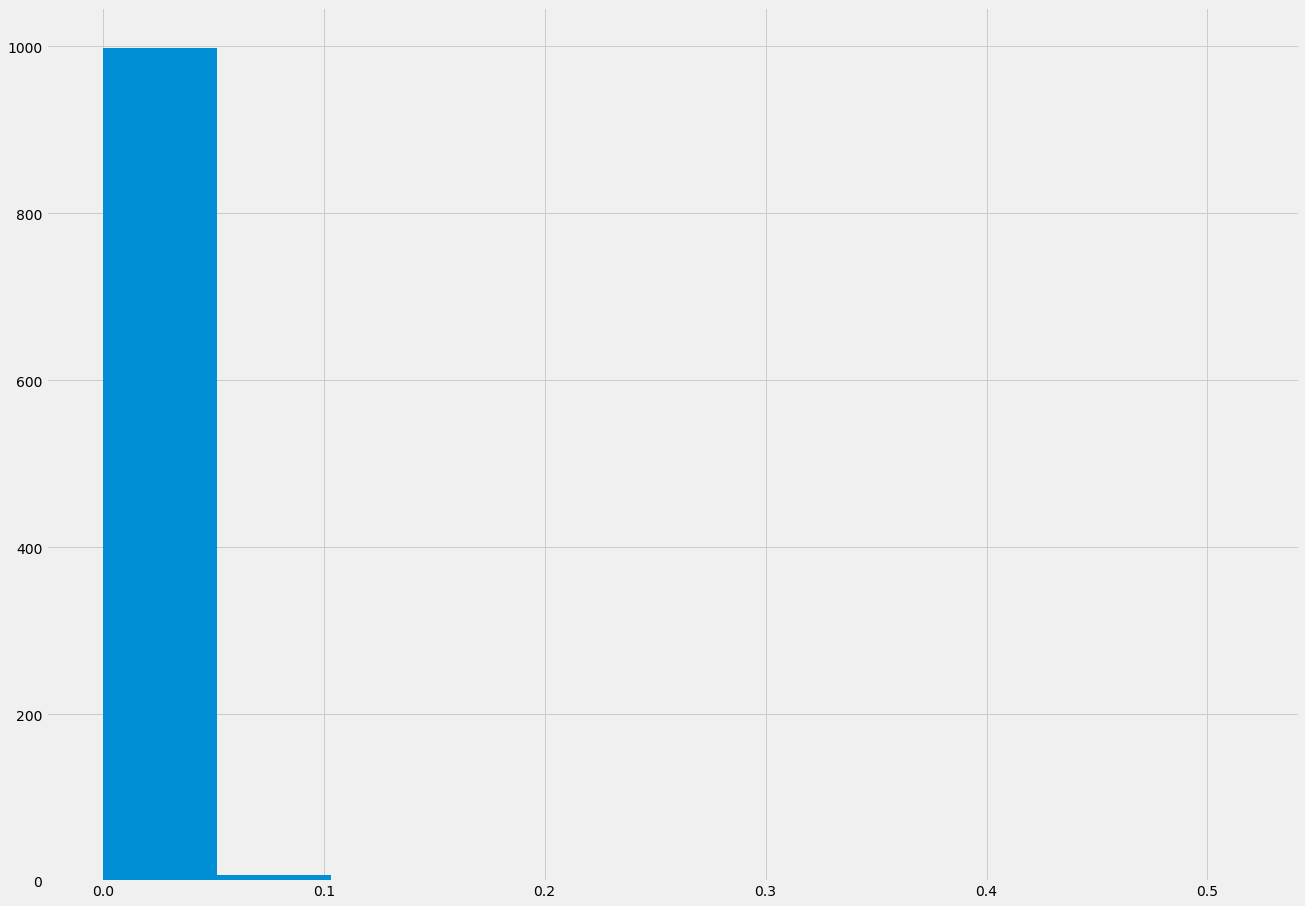

In [65]:
import matplotlib.pyplot as plt
plt.hist (nx.betweenness_centrality (G).values() )

# **مرکزیت بردار ویژه**

In [9]:
nx.eigenvector_centrality_numpy (G)
sorted_eigenvector_centrality = sorted ( nx.eigenvector_centrality_numpy(G).items() , key = lambda x : x[1] , reverse=True)
sorted_eigenvector_centrality [:10]

[('741', 0.19800041948049532),
 ('743', 0.1980004194804953),
 ('736', 0.19800041948049527),
 ('737', 0.19800041948049527),
 ('738', 0.19800041948049527),
 ('733', 0.19800041948049524),
 ('734', 0.19800041948049524),
 ('735', 0.19800041948049524),
 ('739', 0.19800041948049524),
 ('744', 0.1980004194804952)]

(array([981.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   5.,  22.]),
 array([-6.29030277e-19,  1.98000419e-02,  3.96000839e-02,  5.94001258e-02,
         7.92001678e-02,  9.90002097e-02,  1.18800252e-01,  1.38600294e-01,
         1.58400336e-01,  1.78200378e-01,  1.98000419e-01]),
 <a list of 10 Patch objects>)

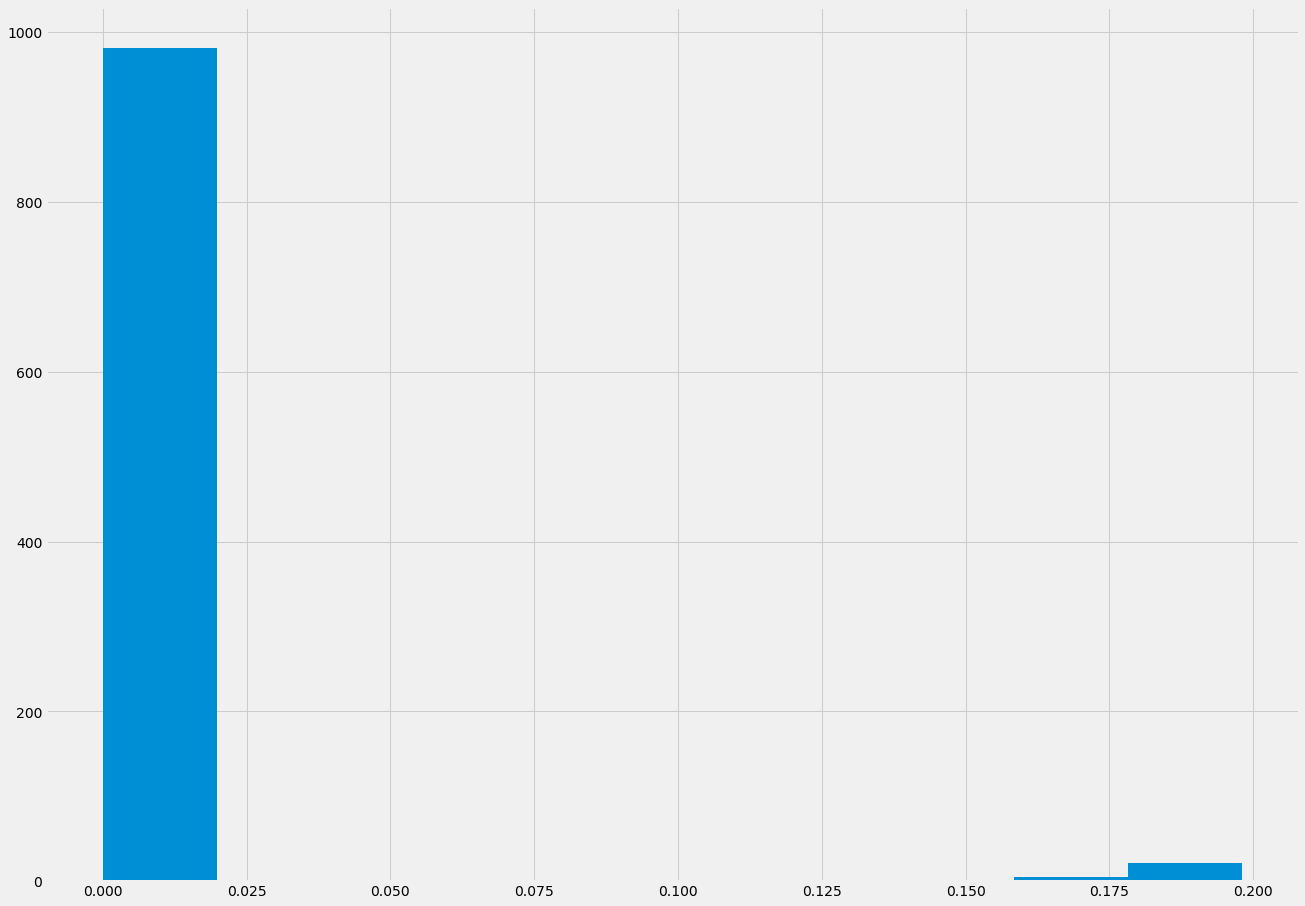

In [67]:
import matplotlib.pyplot as plt
plt.hist (nx.eigenvector_centrality_numpy (G).values())

**نکته: این الگوریتم برای تحلیل مناسب تر  تعدادی از یال ها و گره ها را در هر بار اجرا حذف، بنابراین پس از اجرا مجددا از ابتدا دیتا را اجرا کنید**

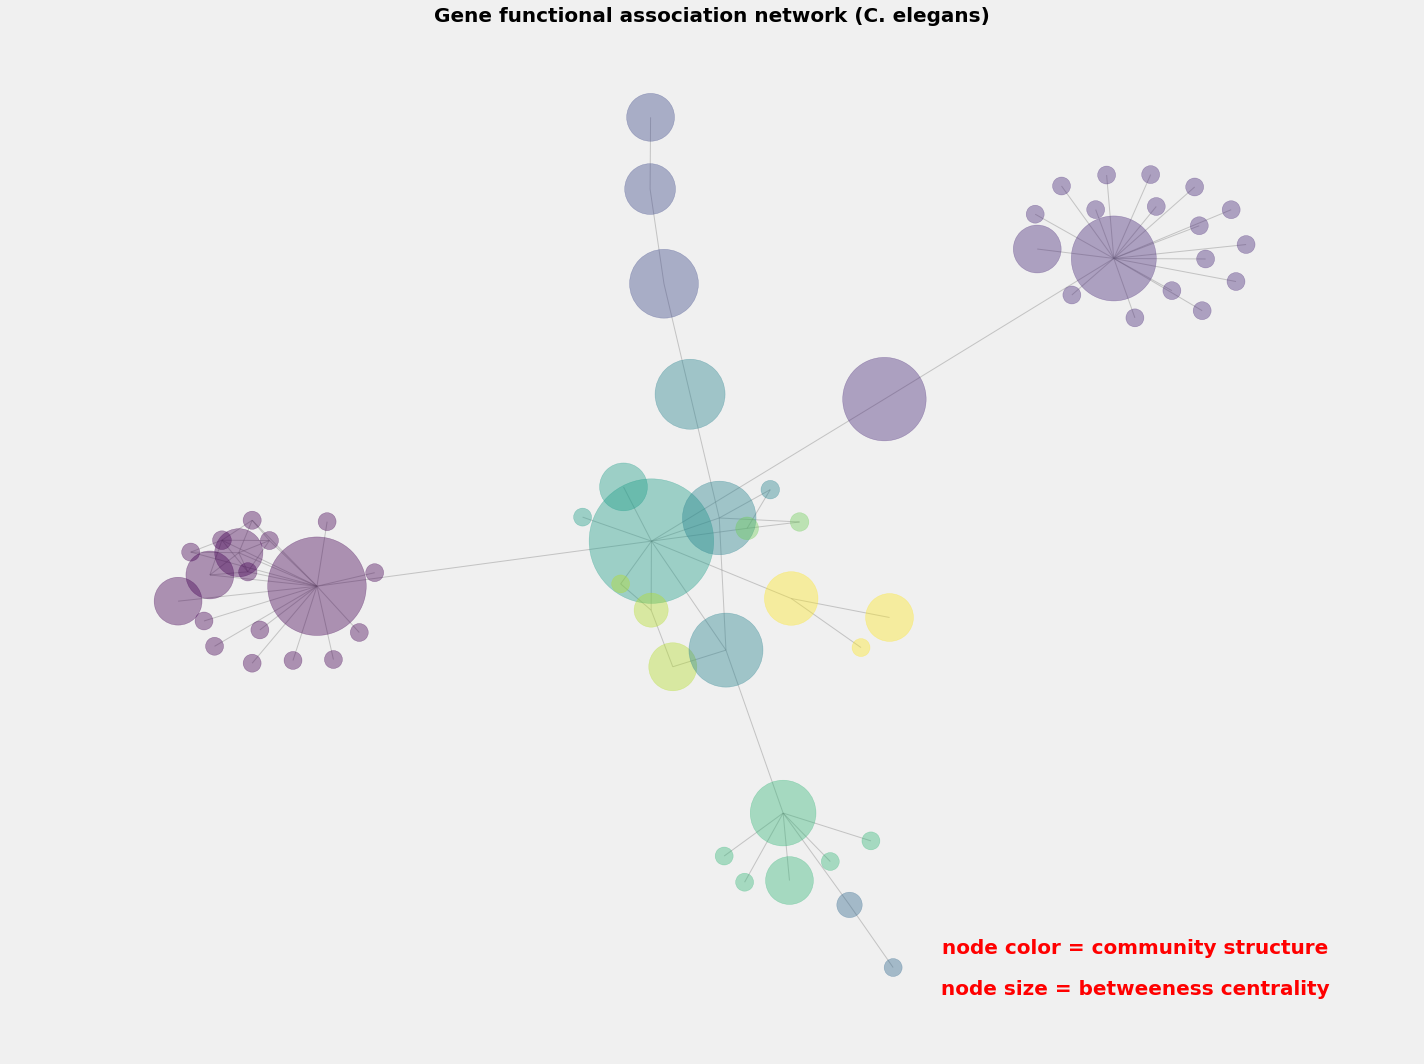

In [75]:
from random import sample
import networkx as nx
import matplotlib.pyplot as plt

# Gold standard data of positive gene functional associations
# from https://www.inetbio.org/wormnet/downloadnetwork.php
#G = nx.read_edgelist("WormNet.v3.benchmark.txt")

# remove randomly selected nodes (to make example fast)
num_to_remove = int(len(G) / 1.5)
nodes = sample(list(G.nodes), num_to_remove)
G.remove_nodes_from(nodes)

# remove low-degree nodes
#low_degree = [n for n, d in G.degree() if d < 1]
#G.remove_nodes_from(low_degree)

# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="grey",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Gene functional association network (C. elegans)", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

# **Girvan_newman Algorithm for making communities**



# **تحلیل k=2**

[['774', '158', '802', '883', '387', '699', '779', '449', '121', '801', '412', '600', '561', '582', '10', '30', '875', '603', '444', '316', '563', '307', '556', '278', '557', '396', '386', '34', '279', '384', '270', '368', '12', '574', '741', '120', '725', '570', '393', '154', '473', '59', '49', '538', '378', '469', '555', '296', '670', '529', '305', '700', '155', '43', '730', '303', '593', '565', '416', '32', '129', '247', '68', '796', '162', '152', '76', '701', '388', '87', '281', '452', '535', '274', '151', '306', '239', '364', '365', '102', '564', '748', '63', '721', '800', '753', '268', '392', '297', '698', '317', '291', '112', '553', '156', '447', '798', '714', '240', '716', '140', '6', '571', '591', '131', '467', '740', '269', '147', '380', '446', '662', '70', '91', '267', '54', '148', '318', '588', '44', '379', '51', '568', '242', '16', '401', '312', '20', '880', '77', '285', '89', '41', '298', '785', '282', '301', '110', '373', '236', '724', '299', '587', '382', '85', '540', '

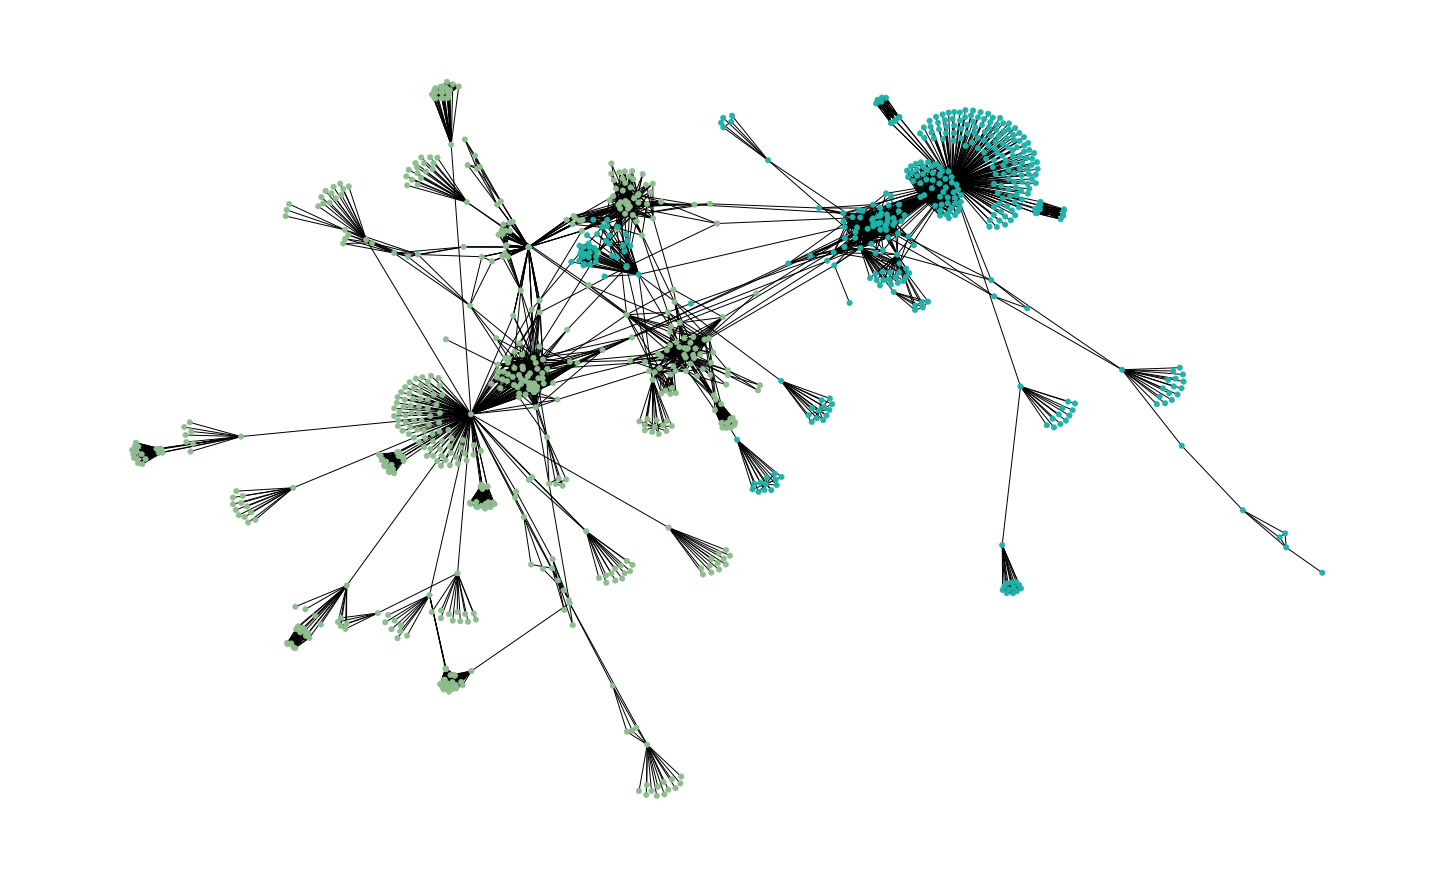

In [45]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

G = nx.read_edgelist ('B2B_Graph.txt', delimiter=None,data=True)
communities = girvan_newman(G)

node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('darkseagreen')
    elif node in node_groups[1]:
         color_map.append('lightseagreen')
    else: 
        color_map.append('green')  
fig = plt.figure("Degree of a random graph", figsize=(20,12))  
nx.draw(G, node_color=color_map, with_labels=False , node_size=30)
plt.show()

# تحلیل k=**8**

In [94]:
import itertools
G = nx.read_edgelist ('B2B_Graph.txt', delimiter=None,data=True)
k = 8
comp = girvan_newman(G)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))

(['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '17', '18', '19', '2', '20', '21', '22', '23', '233', '234', '235', '236', '237', '238', '239', '24', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '26', '267', '268', '269', '27', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '28', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '29', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '3', '30', '300', '301

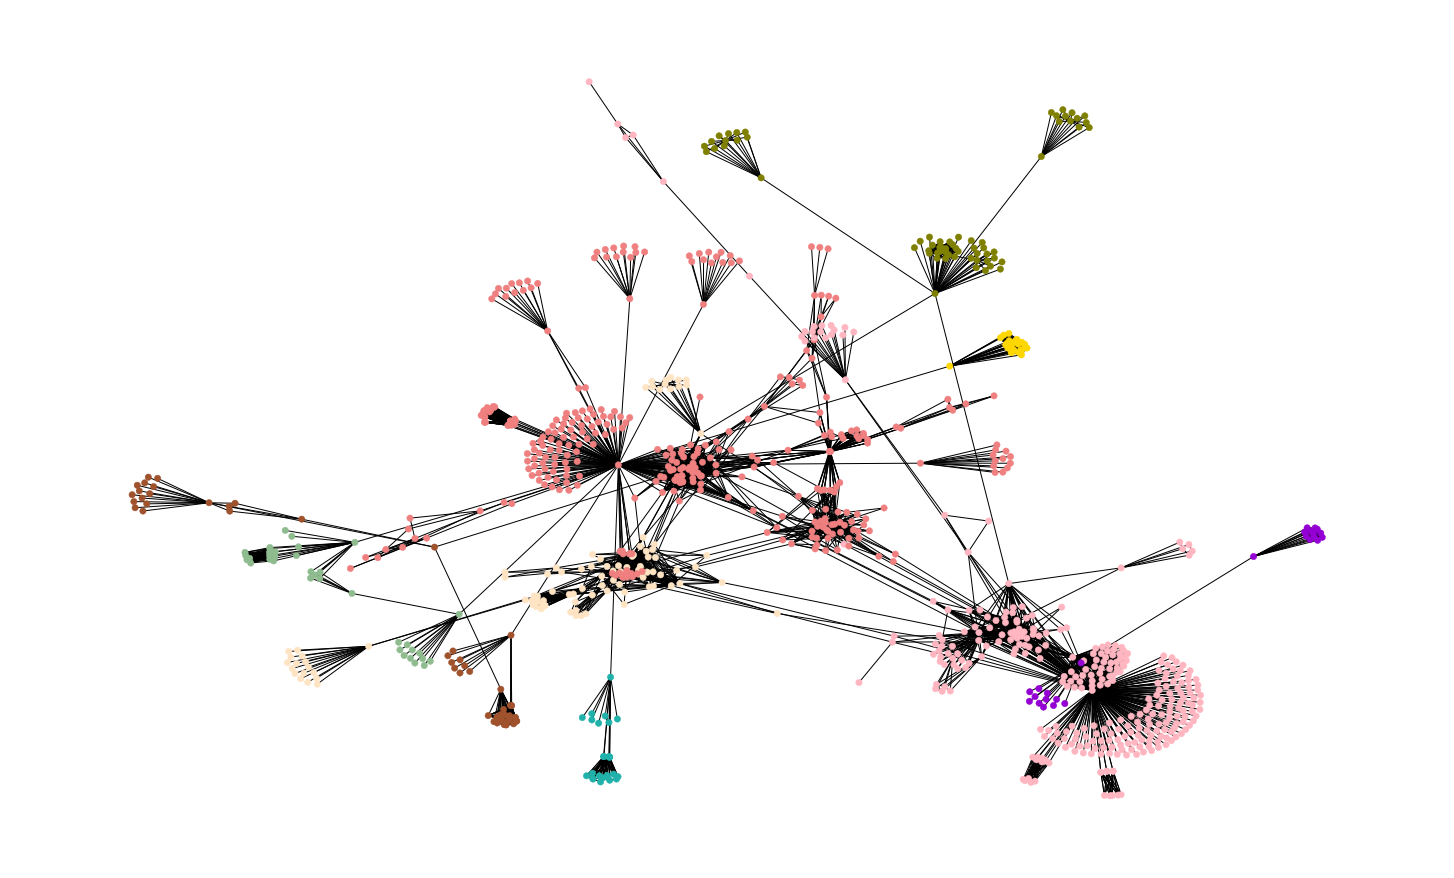

In [96]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
node_groups=(['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '26', '267', '268', '269', '27', '270', '271', '272', '273', '274', '275', '276', '277', '278', '28', '282', '283', '284', '285', '286', '287', '288', '289', '29', '290', '291', '292', '293', '294', '295', '296', '3', '30', '31', '32', '33', '34', '35', '36', '361', '362', '363', '364', '365', '366', '367', '368', '369', '37', '370', '371', '372', '373', '374', '375', '376', '377', '378', '379', '38', '380', '381', '382', '383', '384', '385', '386', '387', '388', '39', '390', '391', '392', '393', '394', '395', '396', '397', '399', '4', '40', '400', '401', '402', '403', '405', '406', '407', '408', '409', '41', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '42', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '43', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '44', '440', '441', '442', '443', '444', '445', '446', '447', '448', '45', '450', '452', '453', '454', '455', '456', '457', '458', '459', '46', '460', '461', '462', '463', '464', '465', '466', '467', '468', '469', '47', '470', '471', '472', '473', '474', '475', '476', '477', '478', '48', '49', '5', '50', '51', '52', '529', '53', '530', '531', '532', '533', '534', '535', '536', '537', '538', '539', '54', '540', '55', '56', '57', '577', '578', '579', '58', '580', '581', '582', '583', '584', '585', '586', '587', '588', '589', '59', '590', '591', '592', '593', '594', '595', '596', '597', '598', '599', '6', '60', '600', '601', '602', '603', '604', '605', '606', '607', '608', '609', '61', '610', '611', '612', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '781', '782', '783', '784', '785', '786', '787', '788', '789', '79', '790', '791', '792', '793', '794', '795', '796', '797', '798', '799', '8', '80', '800', '801', '802', '803', '804', '81', '82', '83', '84', '85', '86', '87', '875', '876', '877', '878', '879', '88', '880', '881', '882', '883', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '\ufeff0'],
 ['1000', '1001', '1002', '1003', '1004', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '25', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '479', '480', '481', '482', '483', '484', '485', '486', '487', '488', '489', '490', '491', '492', '493', '494', '495', '496', '497', '499', '500', '501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517', '518', '519', '520', '521', '522', '523', '524', '525', '526', '527', '528', '815', '816', '817', '818', '819', '820', '821', '822', '823', '824', '825', '826', '827', '828', '829', '830', '831', '832', '833', '834', '835', '836', '837', '838', '839', '840', '841', '842', '843', '844', '845', '846', '847', '848', '849', '850', '851', '852', '853', '854', '855', '856', '857', '858', '859', '860', '861', '862', '863', '864', '865', '866', '867', '868', '869', '870', '871', '872', '873', '874', '884', '885', '886', '887', '888', '889', '890', '891', '892', '893', '894', '895', '896', '897', '898', '899', '900', '901', '902', '903', '904', '905', '906', '907', '908', '909', '910', '911', '912', '913', '914', '915', '916', '917', '918', '919', '920', '921', '922', '923', '924', '925', '926', '927', '928', '929', '930', '931', '932', '933', '934', '935', '936', '937', '938', '939', '940', '941', '942', '943', '944', '945', '946', '947', '948', '949', '950', '951', '952', '953', '954', '955', '956', '957', '958', '959', '960', '961', '962', '963', '964', '965', '966', '967', '968', '969', '970', '971', '972', '973', '974', '975', '976', '977', '978', '979', '980', '981', '982', '983', '984', '985', '986', '987', '988', '989', '990', '991', '992', '993', '994', '995', '996', '997', '998', '999'],
 ['24', '279', '280', '281', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '404', '565', '566', '567', '568', '569', '570', '571', '572', '573', '574', '575', '576', '733', '734', '735', '736', '737', '738', '739', '740', '741', '742', '743', '744', '745', '746', '747', '748', '749', '750', '751', '752', '753', '754', '755', '756'],
 ['112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '248', '249', '250', '251', '252', '253', '254', '313', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '661', '662', '663', '664', '665', '666', '667', '668', '669', '670', '671', '672', '721', '722', '723', '724', '725', '726', '727', '728', '729', '730', '731', '732'],
 ['202', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '637', '638', '639', '640', '641', '642', '643', '644', '645', '646', '647', '648', '649', '650', '651', '652', '653', '654', '655', '656', '657', '658', '659', '660', '673', '674', '675', '676', '677', '678', '679', '680', '681', '682', '683', '684', '757', '758', '759', '760', '761', '762', '763', '764', '765', '766', '767', '768'],
 ['389', '449', '541', '542', '543', '544', '545', '546', '547', '548', '549', '550', '551', '552', '553', '554', '555', '556', '557', '558', '559', '560', '561', '562', '563', '564', '805', '806', '807', '808', '809', '810', '811', '812', '813', '814'],
 ['398', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', '624', '769', '770', '771', '772', '773', '774', '775', '776', '777', '778', '779', '780'],
 ['451', '697', '698', '699', '700', '701', '702', '703', '704', '705', '706', '707', '708', '709', '710', '711', '712', '713', '714', '715', '716', '717', '718', '719', '720'],
 ['498', '625', '626', '627', '628', '629', '630', '631', '632', '633', '634', '635', '636', '685', '686', '687', '688', '689', '690', '691', '692', '693', '694', '695', '696'])
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('lightcoral')
    elif node in node_groups[1]:
         color_map.append('lightpink')
    elif node in node_groups[2]:
         color_map.append('sienna')
    elif node in node_groups[3]:
         color_map.append('bisque')
    elif node in node_groups[4]:
         color_map.append('olive')
    elif node in node_groups[5]:
         color_map.append('darkseagreen')
    elif node in node_groups[6]:
         color_map.append('lightseagreen')
    elif node in node_groups[7]:
         color_map.append('gold')
    else: 
        color_map.append('darkviolet')
fig = plt.figure("Degree of a random graph", figsize=(20,12))  
nx.draw(G, node_color=color_map, with_labels=False ,node_size=40)
plt.show()


In [93]:
G.degree['0']

25

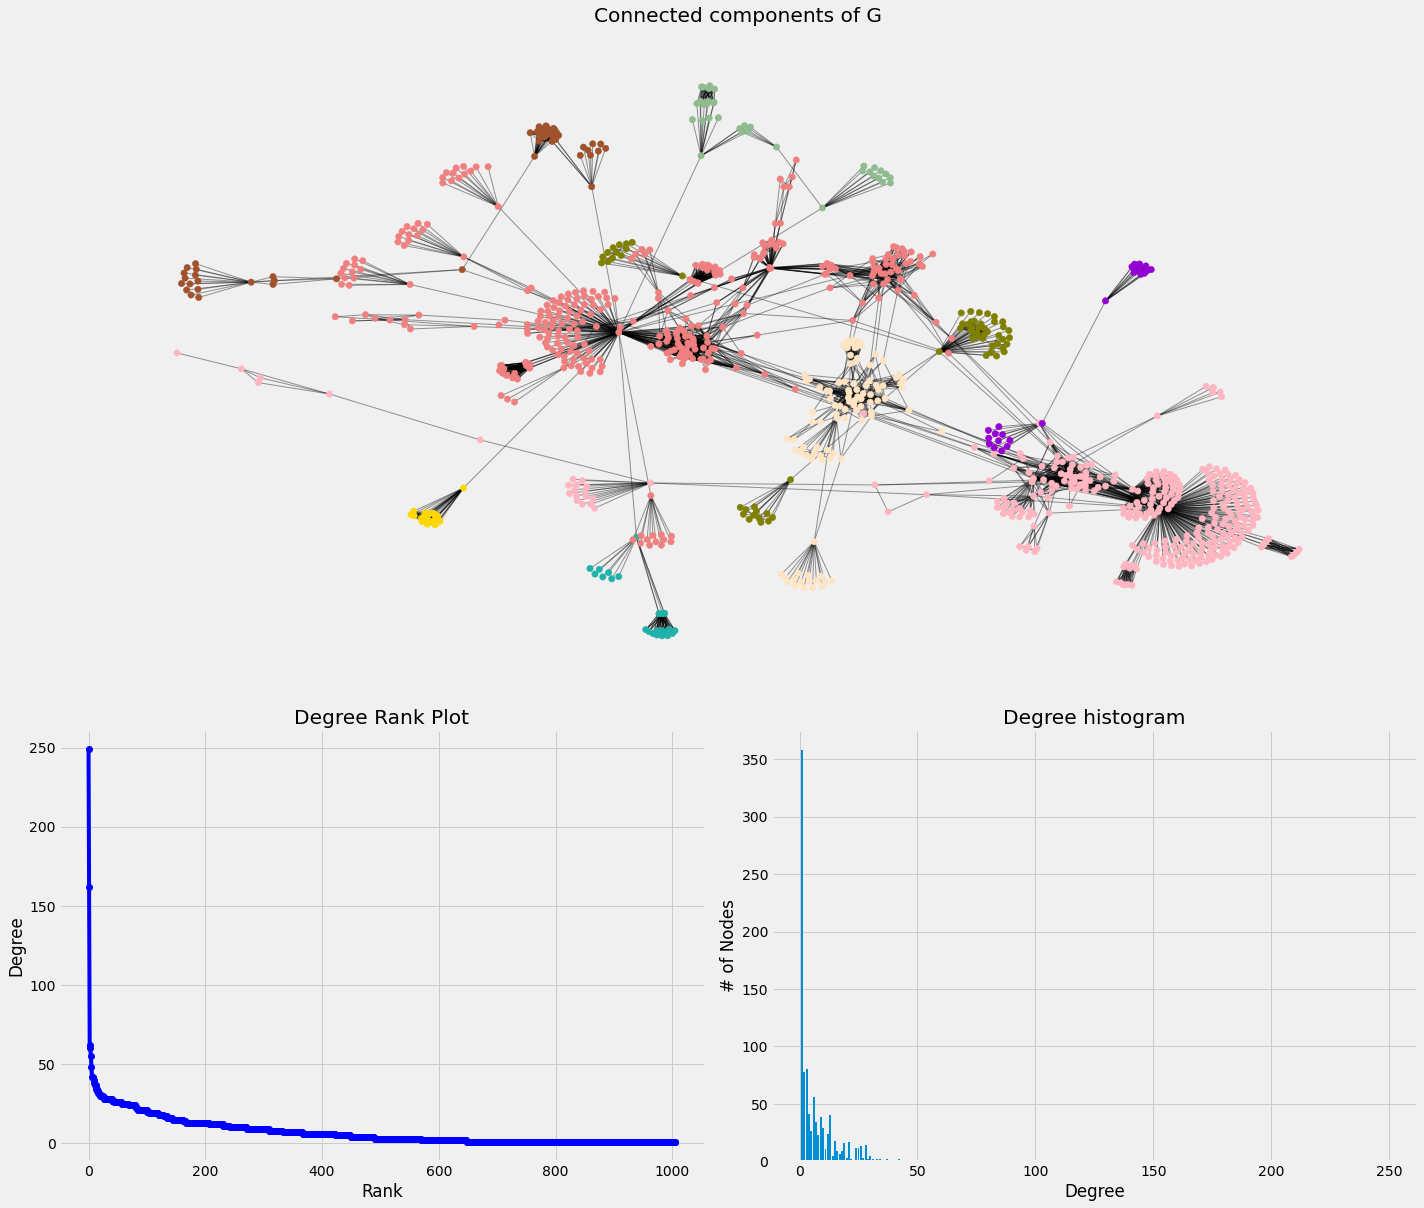

In [97]:
node_groups=(['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '26', '267', '268', '269', '27', '270', '271', '272', '273', '274', '275', '276', '277', '278', '28', '282', '283', '284', '285', '286', '287', '288', '289', '29', '290', '291', '292', '293', '294', '295', '296', '3', '30', '31', '32', '33', '34', '35', '36', '361', '362', '363', '364', '365', '366', '367', '368', '369', '37', '370', '371', '372', '373', '374', '375', '376', '377', '378', '379', '38', '380', '381', '382', '383', '384', '385', '386', '387', '388', '39', '390', '391', '392', '393', '394', '395', '396', '397', '399', '4', '40', '400', '401', '402', '403', '405', '406', '407', '408', '409', '41', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '42', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '43', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '44', '440', '441', '442', '443', '444', '445', '446', '447', '448', '45', '450', '452', '453', '454', '455', '456', '457', '458', '459', '46', '460', '461', '462', '463', '464', '465', '466', '467', '468', '469', '47', '470', '471', '472', '473', '474', '475', '476', '477', '478', '48', '49', '5', '50', '51', '52', '529', '53', '530', '531', '532', '533', '534', '535', '536', '537', '538', '539', '54', '540', '55', '56', '57', '577', '578', '579', '58', '580', '581', '582', '583', '584', '585', '586', '587', '588', '589', '59', '590', '591', '592', '593', '594', '595', '596', '597', '598', '599', '6', '60', '600', '601', '602', '603', '604', '605', '606', '607', '608', '609', '61', '610', '611', '612', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '781', '782', '783', '784', '785', '786', '787', '788', '789', '79', '790', '791', '792', '793', '794', '795', '796', '797', '798', '799', '8', '80', '800', '801', '802', '803', '804', '81', '82', '83', '84', '85', '86', '87', '875', '876', '877', '878', '879', '88', '880', '881', '882', '883', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '\ufeff0'],
 ['1000', '1001', '1002', '1003', '1004', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '25', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '479', '480', '481', '482', '483', '484', '485', '486', '487', '488', '489', '490', '491', '492', '493', '494', '495', '496', '497', '499', '500', '501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517', '518', '519', '520', '521', '522', '523', '524', '525', '526', '527', '528', '815', '816', '817', '818', '819', '820', '821', '822', '823', '824', '825', '826', '827', '828', '829', '830', '831', '832', '833', '834', '835', '836', '837', '838', '839', '840', '841', '842', '843', '844', '845', '846', '847', '848', '849', '850', '851', '852', '853', '854', '855', '856', '857', '858', '859', '860', '861', '862', '863', '864', '865', '866', '867', '868', '869', '870', '871', '872', '873', '874', '884', '885', '886', '887', '888', '889', '890', '891', '892', '893', '894', '895', '896', '897', '898', '899', '900', '901', '902', '903', '904', '905', '906', '907', '908', '909', '910', '911', '912', '913', '914', '915', '916', '917', '918', '919', '920', '921', '922', '923', '924', '925', '926', '927', '928', '929', '930', '931', '932', '933', '934', '935', '936', '937', '938', '939', '940', '941', '942', '943', '944', '945', '946', '947', '948', '949', '950', '951', '952', '953', '954', '955', '956', '957', '958', '959', '960', '961', '962', '963', '964', '965', '966', '967', '968', '969', '970', '971', '972', '973', '974', '975', '976', '977', '978', '979', '980', '981', '982', '983', '984', '985', '986', '987', '988', '989', '990', '991', '992', '993', '994', '995', '996', '997', '998', '999'],
 ['24', '279', '280', '281', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '404', '565', '566', '567', '568', '569', '570', '571', '572', '573', '574', '575', '576', '733', '734', '735', '736', '737', '738', '739', '740', '741', '742', '743', '744', '745', '746', '747', '748', '749', '750', '751', '752', '753', '754', '755', '756'],
 ['112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '248', '249', '250', '251', '252', '253', '254', '313', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '661', '662', '663', '664', '665', '666', '667', '668', '669', '670', '671', '672', '721', '722', '723', '724', '725', '726', '727', '728', '729', '730', '731', '732'],
 ['202', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '637', '638', '639', '640', '641', '642', '643', '644', '645', '646', '647', '648', '649', '650', '651', '652', '653', '654', '655', '656', '657', '658', '659', '660', '673', '674', '675', '676', '677', '678', '679', '680', '681', '682', '683', '684', '757', '758', '759', '760', '761', '762', '763', '764', '765', '766', '767', '768'],
 ['389', '449', '541', '542', '543', '544', '545', '546', '547', '548', '549', '550', '551', '552', '553', '554', '555', '556', '557', '558', '559', '560', '561', '562', '563', '564', '805', '806', '807', '808', '809', '810', '811', '812', '813', '814'],
 ['398', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', '624', '769', '770', '771', '772', '773', '774', '775', '776', '777', '778', '779', '780'],
 ['451', '697', '698', '699', '700', '701', '702', '703', '704', '705', '706', '707', '708', '709', '710', '711', '712', '713', '714', '715', '716', '717', '718', '719', '720'],
 ['498', '625', '626', '627', '628', '629', '630', '631', '632', '633', '634', '635', '636', '685', '686', '687', '688', '689', '690', '691', '692', '693', '694', '695', '696'])
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('lightcoral')
    elif node in node_groups[1]:
         color_map.append('lightpink')
    elif node in node_groups[2]:
         color_map.append('sienna')
    elif node in node_groups[3]:
         color_map.append('bisque')
    elif node in node_groups[4]:
         color_map.append('olive')
    elif node in node_groups[5]:
         color_map.append('darkseagreen')
    elif node in node_groups[6]:
         color_map.append('lightseagreen')
    elif node in node_groups[7]:
         color_map.append('gold')
    else: 
        color_map.append('darkviolet')

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#G = nx.gnp_random_graph(100, 0.02, seed=10374196)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(20,17))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, node_color=color_map, ax=ax0, node_size=40)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

# **محاسبه مرکزیت درجه ای**

In [167]:
#Groups[0]
sorted_degree_dict = sorted( dict( G.degree(node_groups[0])).items()  , key = lambda x : x[1] , reverse=True )
print('sorted_degree_group 1')
print(sorted_degree_dict [:10])
print('___________________________________________________________________')
#Groups[1]
sorted_degree_dict = sorted( dict( G.degree(node_groups[1])).items()  , key = lambda x : x[1] , reverse=True )
print('sorted_degree_group 2')
print(sorted_degree_dict [:10])
print('___________________________________________________________________')
#Groups[2]
sorted_degree_dict = sorted( dict( G.degree(node_groups[2])).items()  , key = lambda x : x[1] , reverse=True )
print('sorted_degree_group 3')
print(sorted_degree_dict [:10])
print('___________________________________________________________________')
#Groups[3]
sorted_degree_dict = sorted( dict( G.degree(node_groups[3])).items()  , key = lambda x : x[1] , reverse=True )
print('sorted_degree_group 4')
print(sorted_degree_dict [:10])
print('___________________________________________________________________')
#Groups[4]
sorted_degree_dict = sorted( dict( G.degree(node_groups[4])).items()  , key = lambda x : x[1] , reverse=True )
print('sorted_degree_group 5')
print(sorted_degree_dict [:10])
print('___________________________________________________________________')
#Groups[5]
sorted_degree_dict = sorted( dict( G.degree(node_groups[5])).items()  , key = lambda x : x[1] , reverse=True )
print('sorted_degree_group 6')
print(sorted_degree_dict [:10])
print('___________________________________________________________________')
#Groups[6]
sorted_degree_dict = sorted( dict( G.degree(node_groups[6])).items()  , key = lambda x : x[1] , reverse=True )
print('sorted_degree_group 7')
print(sorted_degree_dict [:10])
print('___________________________________________________________________')
#Groups[7]
sorted_degree_dict = sorted( dict( G.degree(node_groups[7])).items()  , key = lambda x : x[1] , reverse=True )
print('sorted_degree_group 8')
print(sorted_degree_dict [:10])
print('___________________________________________________________________')
#Groups[8]
sorted_degree_dict = sorted( dict( G.degree(node_groups[8])).items()  , key = lambda x : x[1] , reverse=True )
print('sorted_degree_group 9')
print(sorted_degree_dict [:10])
print('___________________________________________________________________')

sorted_degree_group 1
[('33', 162), ('63', 48), ('18', 42), ('47', 41), ('38', 40), ('77', 37), ('21', 33), ('4', 33), ('8', 32), ('31', 31)]
___________________________________________________________________
sorted_degree_group 2
[('221', 249), ('223', 62), ('227', 60), ('226', 55), ('231', 37), ('167', 34), ('168', 31), ('220', 30), ('206', 29), ('209', 28)]
___________________________________________________________________
sorted_degree_group 3
[('733', 28), ('734', 28), ('735', 28), ('736', 28), ('737', 28), ('738', 28), ('739', 28), ('741', 28), ('743', 28), ('744', 28)]
___________________________________________________________________
sorted_degree_group 4
[('119', 38), ('156', 34), ('149', 26), ('143', 25), ('162', 25), ('120', 24), ('131', 24), ('135', 21), ('117', 18), ('155', 18)]
___________________________________________________________________
sorted_degree_group 5
[('202', 42), ('684', 14), ('330', 13), ('332', 13), ('338', 13), ('339', 13), ('340', 13), ('341', 13),

# **محاسبه مرکزیت نزدیکی**

In [159]:
sorted_clossness_centrality = sorted ( nx.closeness_centrality(G).items() , key = lambda x : x[1] , reverse=True)
print(sorted_clossness_centrality [:])
print('___________________________________________________________________')

for j in range(0,9):
  clossness_G=[]
  #print(node_groups[j])
  for i in sorted_clossness_centrality [:]:
    
    if i[0] in  node_groups[j]:
      clossness_G.append(i)
  print('sorted of centrality_group', j+1)
  print(clossness_G)
  print('___________________________________________________________________')

[('33', 0.31337698783910195), ('223', 0.30932594644506), ('35', 0.3062157221206581), ('221', 0.29804270462633453), ('42', 0.29619805481874445), ('57', 0.29541446208112876), ('193', 0.2896253602305475), ('183', 0.28862722573233773), ('38', 0.28722492140611605), ('47', 0.28357787810383744), ('18', 0.2830985915492958), ('32', 0.2830985915492958), ('4', 0.2776243093922652), ('167', 0.2739165985282093), ('220', 0.2733206418275768), ('8', 0.27154823020805186), ('21', 0.27103559870550165), ('58', 0.27045209903121636), ('209', 0.27045209903121636), ('55', 0.2700886858371406), ('231', 0.27001612036539496), ('210', 0.26907630522088355), ('177', 0.26886035313001605), ('17', 0.26785714285714285), ('405', 0.26757188498402557), ('406', 0.26757188498402557), ('407', 0.26757188498402557), ('408', 0.26757188498402557), ('409', 0.26757188498402557), ('410', 0.26757188498402557), ('411', 0.26757188498402557), ('412', 0.26757188498402557), ('413', 0.26757188498402557), ('414', 0.26757188498402557), ('415'

# **محسابه مرکزیت بینابینی**

In [160]:
sorted_betweenness_centrality = sorted ( nx.betweenness_centrality(G).items() , key = lambda x : x[1] , reverse=True)
print(sorted_betweenness_centrality [:10])
print('___________________________________________________________________')

for j in range(0,9):
  betweenness_G=[]
  #print(node_groups[j])
  for i in sorted_betweenness_centrality [:]:
    
    if i[0] in  node_groups[j]:
      betweenness_G.append(i)
  print('sorted_betweenness_centrality_group', j+1)
  print(betweenness_G)
  print('___________________________________________________________________')

[('33', 0.520627257452383), ('221', 0.4179908429801003), ('223', 0.19802474848348303), ('35', 0.1790153788121403), ('202', 0.13209422373528298), ('167', 0.10698532956486251), ('42', 0.08233138331182487), ('193', 0.08224966623260366), ('183', 0.07684131178165053), ('57', 0.07679454862270844)]
___________________________________________________________________
sorted_betweenness_centrality_group 1
[('33', 0.520627257452383), ('35', 0.1790153788121403), ('42', 0.08233138331182487), ('57', 0.07679454862270844), ('21', 0.04983501039110831), ('38', 0.04006539580628437), ('46', 0.03312407602011934), ('23', 0.032661540456636426), ('63', 0.02906223362759753), ('103', 0.02881619098530533), ('64', 0.025768252719344704), ('457', 0.023749777011357553), ('434', 0.023749777011357553), ('440', 0.023749777011357553), ('467', 0.023749777011357553), ('18', 0.02144019693687924), ('39', 0.021058316739931027), ('106', 0.019500382198004183), ('11', 0.018647740382081165), ('28', 0.017640330104659763), ('77', 

# محسابه مرکزیت بردار **ویژه**

In [161]:
nx.eigenvector_centrality_numpy (G)
sorted_eigenvector_centrality = sorted ( nx.eigenvector_centrality_numpy(G).items() , key = lambda x : x[1] , reverse=True)
print(sorted_eigenvector_centrality [:20])
print('___________________________________________________________________')

for j in range(0,9):
  eigenvector_G=[]
  #print(node_groups[j])
  for i in sorted_eigenvector_centrality [:]:
    
    if i[0] in  node_groups[j]:
      eigenvector_G.append(i)
  print('sorted_eigenvector_centrality_group', j+1)
  print(eigenvector_G)
  print('___________________________________________________________________')

[('738', 0.19800041948049532), ('734', 0.1980004194804953), ('741', 0.1980004194804953), ('743', 0.1980004194804953), ('735', 0.19800041948049527), ('739', 0.19800041948049527), ('733', 0.19800041948049524), ('737', 0.19800041948049524), ('744', 0.19800041948049524), ('736', 0.19800041948049518), ('754', 0.1895759220436163), ('747', 0.18957592204361629), ('750', 0.18957592204361626), ('751', 0.18957592204361626), ('756', 0.18957592204361626), ('746', 0.18957592204361623), ('749', 0.18957592204361623), ('752', 0.18957592204361623), ('753', 0.18957592204361623), ('745', 0.18957592204361617)]
___________________________________________________________________
sorted_eigenvector_centrality_group 1
[('33', 0.0021119344305611997), ('21', 0.0008168852188319558), ('47', 0.000618729180389105), ('8', 0.0005762813851229108), ('31', 0.0005603809306404141), ('18', 0.0005520262929998845), ('38', 0.0005330585699575436), ('58', 0.00048468622255109866), ('4', 0.0004753118127454005), ('0', 0.00047485232

# **تحلیل تراگذاری**

In [162]:
transitivity=nx.transitivity(G)
transitivity

0.2938480793299316

# **تحلیل چگالی**

In [163]:
density=nx.density(G)
density

0.007576431955530498

(array([395.,  37.,  33., 112.,  57.,  60., 100.,  17.,  40., 160.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

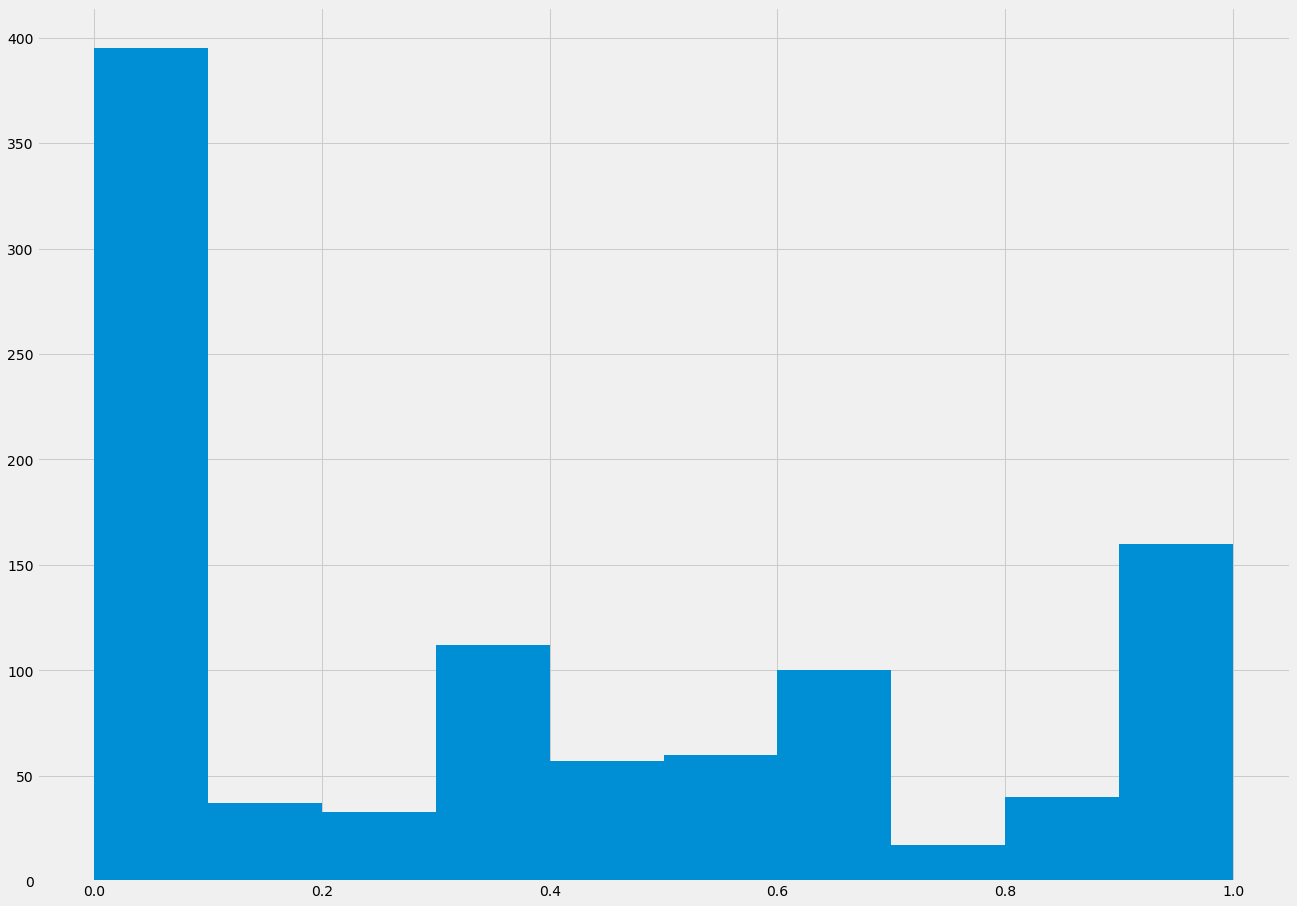

In [36]:
import matplotlib.pyplot as plt
plt.hist (nx.clustering (G).values() )

In [168]:
# Node Numbers

#len (G.nodes)
G.order()

1006

In [169]:
# Edge Numbers

#len (G.edges)
G.size()

3830

In [170]:
# Degree

G.degree()

DegreeView({'\ufeff0': 1, '26': 9, '0': 25, '38': 40, '47': 41, '33': 162, '46': 20, '1': 8, '55': 29, '18': 42, '65': 10, '2': 3, '3': 5, '58': 28, '4': 33, '40': 7, '49': 11, '17': 24, '11': 11, '7': 6, '21': 33, '12': 19, '29': 22, '20': 7, '25': 2, '31': 31, '5': 22, '16': 4, '9': 7, '52': 25, '6': 4, '8': 32, '28': 21, '10': 19, '13': 4, '15': 8, '14': 4, '103': 10, '42': 8, '45': 16, '56': 23, '43': 20, '30': 7, '57': 21, '59': 6, '27': 6, '48': 6, '19': 7, '22': 8, '53': 5, '50': 17, '41': 9, '32': 27, '23': 8, '106': 16, '24': 4, '34': 5, '54': 12, '51': 7, '37': 9, '35': 5, '36': 6, '386': 3, '387': 3, '466': 3, '223': 62, '39': 8, '193': 9, '44': 11, '117': 18, '60': 3, '77': 37, '63': 48, '61': 4, '67': 21, '62': 11, '111': 28, '87': 28, '78': 18, '93': 6, '74': 5, '81': 30, '80': 27, '79': 8, '99': 27, '95': 10, '66': 16, '69': 3, '89': 4, '90': 5, '86': 16, '107': 2, '104': 8, '96': 7, '72': 5, '82': 9, '73': 15, '92': 17, '102': 13, '64': 7, '210': 15, '83': 10, '98': 7, 

In [171]:
type(G.degree())

networkx.classes.reportviews.DegreeView

In [6]:
#GROUP_LEVEL_ANALYSIS

In [13]:
Cliques = list (nx.find_cliques_recursive(G))
Cliques = list (filter (lambda x : len(x) >= 3 , Cliques ))
Cliques.sort (key = lambda x : len(x) , reverse = True)

In [30]:
len (Cliques)

1381

In [14]:
Cliques_len = list (map (len , Cliques))
print(Cliques_len)

[23, 23, 23, 23, 23, 22, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 11, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [15]:
import itertools 
a = list(itertools.chain.from_iterable (Cliques) )

In [16]:
from collections import Counter
#Counter (a)
Cliques_num = sorted ( dict (Counter (a)).items() , key = lambda x : x[1] , reverse = True )
Cliques_num [:10]

[('33', 336),
 ('221', 216),
 ('8', 140),
 ('223', 123),
 ('47', 116),
 ('21', 110),
 ('31', 102),
 ('202', 83),
 ('18', 71),
 ('168', 64)]

In [84]:
# CPM

from itertools import combinations

def get_percolated_cliques(G, k):
    cliques = list(frozenset(c) for c in nx.find_cliques(G) if len(c) >= k)

    perc_graph = nx.Graph()
    perc_graph.add_nodes_from(cliques)
    for c1, c2 in combinations(cliques, 2):
        if len(c1.intersection(c2)) >= (k - 1):
            perc_graph.add_edge(c1, c2)

    for component in nx.connected_components(perc_graph):
        yield(frozenset.union(*component))

In [18]:
get_percolated_cliques (G , 10)

<generator object get_percolated_cliques at 0x7f77fe1a90d0>

In [56]:
communities = list (get_percolated_cliques (G , 5))
len (communities)

9

In [57]:
communities_len = list (map (len , communities))
communities_len

[16, 25, 34, 56, 45, 13, 29, 38, 13]

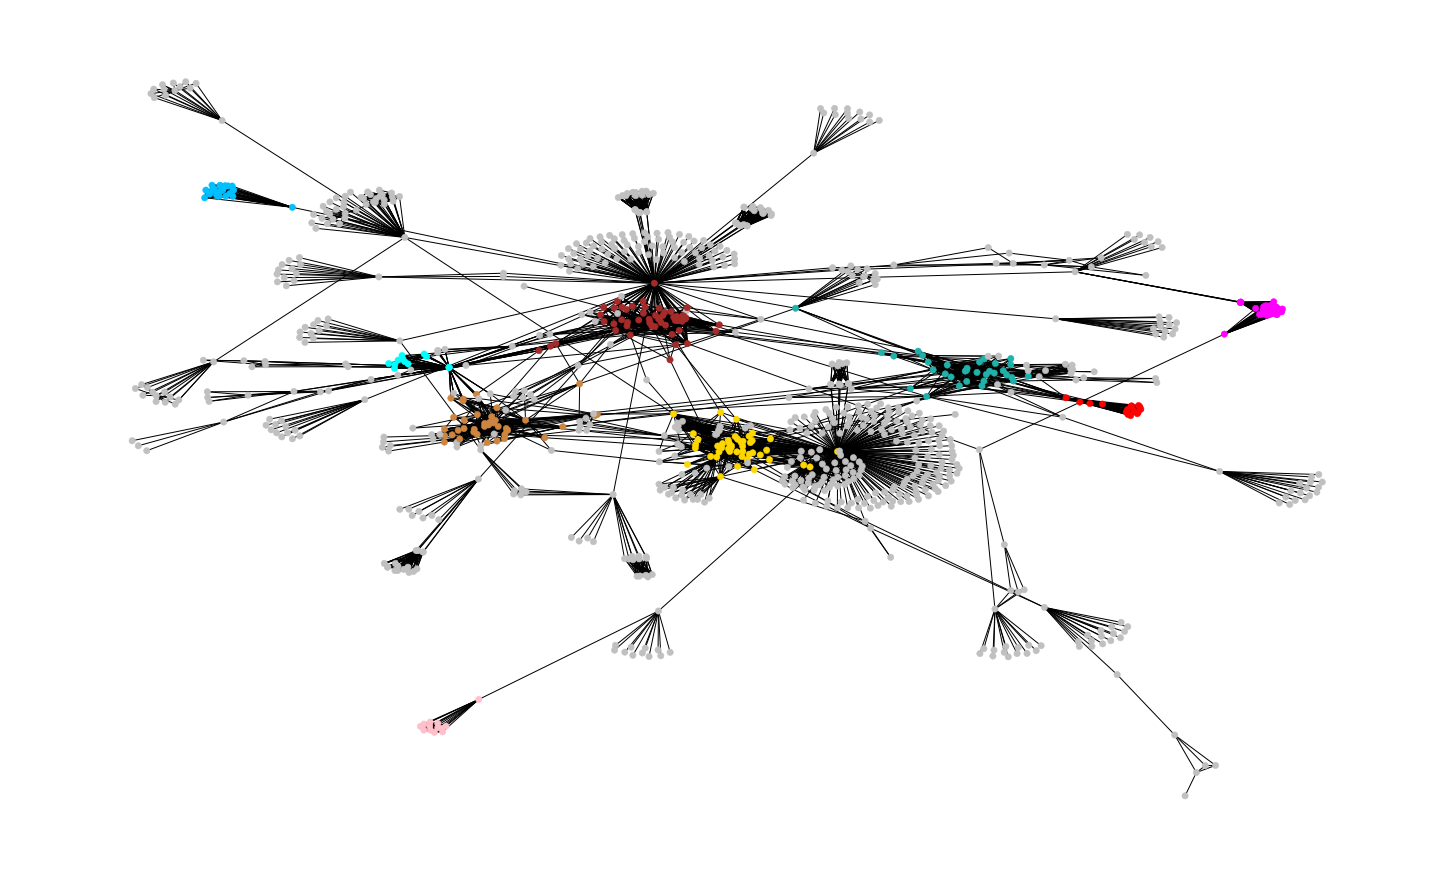

In [64]:
color_map = []
for i in list(G.nodes) :
  if i in set(communities[0]).intersection(communities[1]): color_map.append ('deepskyblue')
  elif i in communities[0] : color_map.append ('red')
  elif i in communities[1] : color_map.append ('deepskyblue')
  elif i in communities[2] : color_map.append ('lightseagreen')
  elif i in communities[3] : color_map.append ('brown')
  elif i in communities[4] : color_map.append ('gold')
  elif i in communities[5] : color_map.append ('cyan')
  elif i in communities[6] : color_map.append ('fuchsia')
  elif i in communities[7] : color_map.append ('peru')
  elif i in communities[8] : color_map.append ('pink')

  #elif i in communities[2] : color_map.append ('blue')
  else : color_map.append ('silver')

nx.draw(G, node_size=40 , node_color=color_map)

In [85]:
communities = list (get_percolated_cliques (G ,10))
len (communities)

6

In [30]:
communities_len = list (map (len , communities))
communities_len

[25, 24, 29, 35, 13, 17, 16, 31]

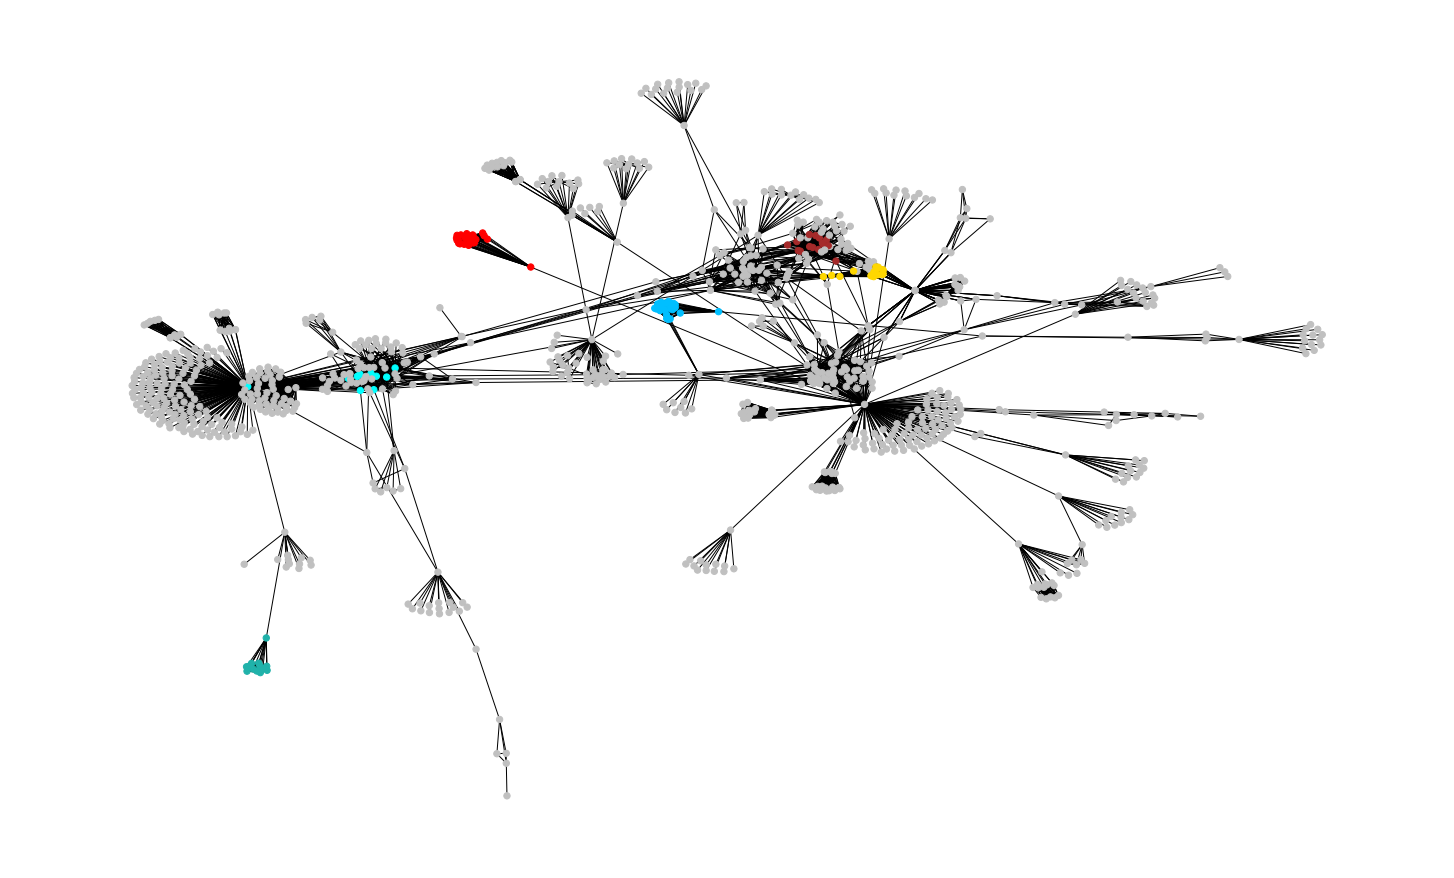

In [25]:
color_map = []
for i in list(G.nodes) :
  if i in set(communities[0]).intersection(communities[1]): color_map.append ('deepskyblue')
  elif i in communities[0] : color_map.append ('red')
  elif i in communities[1] : color_map.append ('deepskyblue')
  elif i in communities[2] : color_map.append ('lightseagreen')
  elif i in communities[3] : color_map.append ('brown')
  elif i in communities[4] : color_map.append ('gold')
  elif i in communities[5] : color_map.append ('cyan')
  #elif i in communities[6] : color_map.append ('fuchsia')
  #elif i in communities[7] : color_map.append ('peru')
  #elif i in communities[8] : color_map.append ('pink')

  #elif i in communities[2] : color_map.append ('blue')
  else : color_map.append ('silver')

fig = plt.figure("Degree of a random graph", figsize=(20,12))  
nx.draw(G, node_color=color_map, with_labels=False ,node_size=40)
plt.show()

In [26]:
communities = list (get_percolated_cliques (G ,15))
len (communities)

2

In [27]:
communities_len = list (map (len , communities))
communities_len

[22, 27]

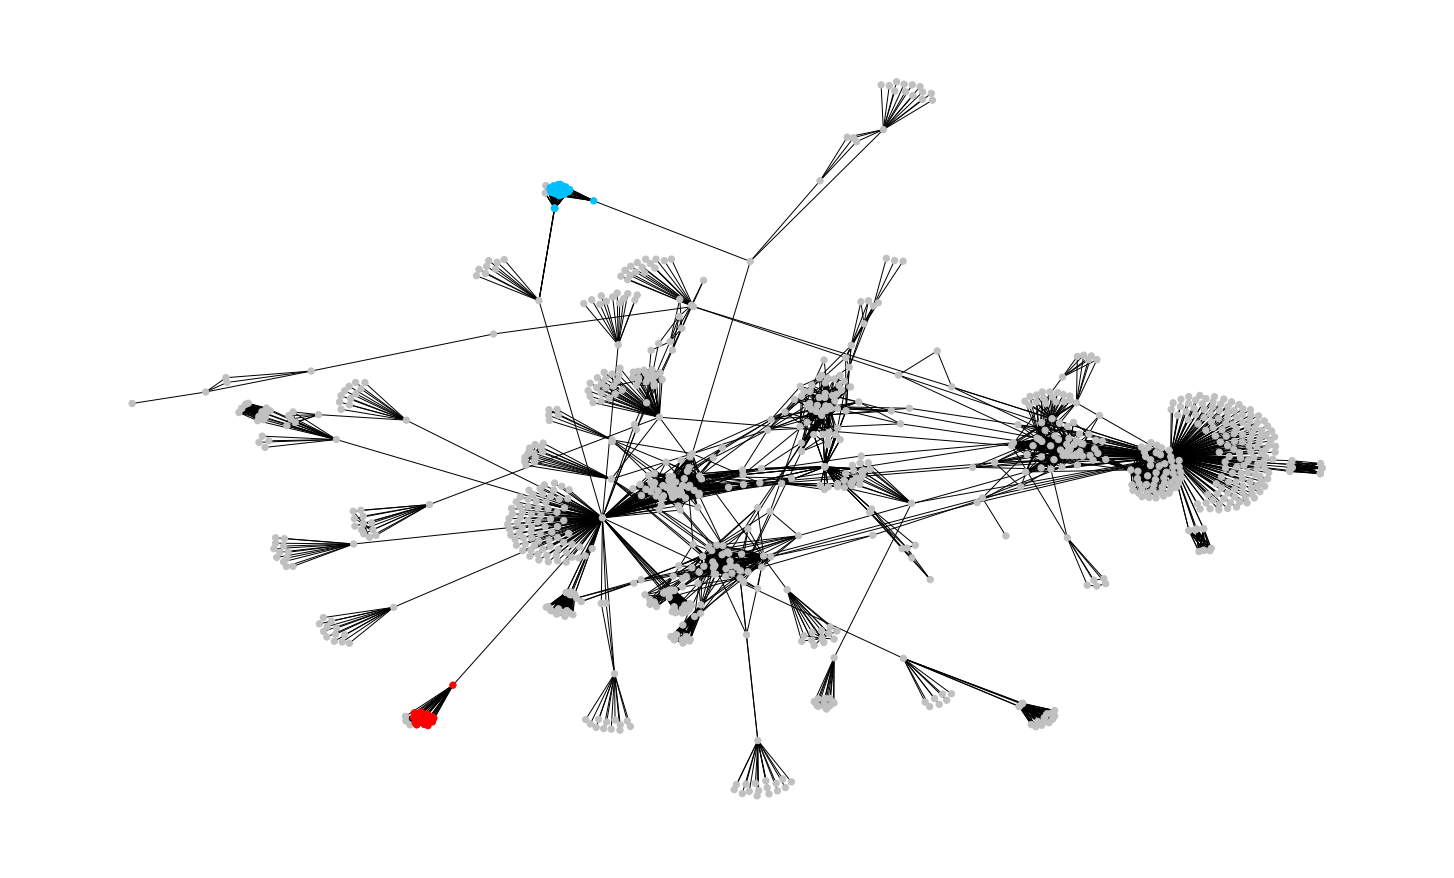

In [28]:
color_map = []
for i in list(G.nodes) :
  if i in set(communities[0]).intersection(communities[1]): color_map.append ('deepskyblue')
  elif i in communities[0] : color_map.append ('red')
  elif i in communities[1] : color_map.append ('deepskyblue')
  #elif i in communities[2] : color_map.append ('lightseagreen')
  #elif i in communities[3] : color_map.append ('brown')
  #elif i in communities[4] : color_map.append ('gold')
  #elif i in communities[5] : color_map.append ('cyan')
  #elif i in communities[6] : color_map.append ('fuchsia')
  #elif i in communities[7] : color_map.append ('peru')
  #elif i in communities[8] : color_map.append ('pink')

  #elif i in communities[2] : color_map.append ('blue')
  else : color_map.append ('silver')

fig = plt.figure("Degree of a random graph", figsize=(20,12))  
nx.draw(G, node_color=color_map, with_labels=False ,node_size=40)
plt.show()

In [34]:
nx.degree(G)
degree_dict = sorted( dict(nx.degree(G)).items() , key = lambda x : x[1] , reverse = True ) 
degree_dict [:20]

[('221', 249),
 ('33', 162),
 ('223', 62),
 ('227', 60),
 ('226', 55),
 ('63', 48),
 ('18', 42),
 ('202', 42),
 ('47', 41),
 ('38', 40),
 ('119', 38),
 ('77', 37),
 ('231', 37),
 ('156', 34),
 ('167', 34),
 ('4', 33),
 ('21', 33),
 ('8', 32),
 ('31', 31),
 ('168', 31)]

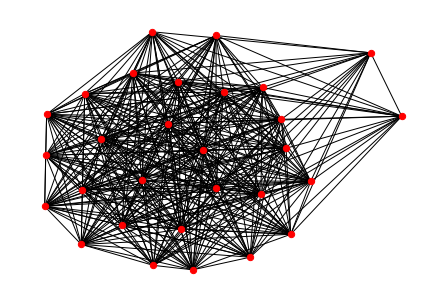

In [73]:
# Ego Network 

Ego_Network = nx.ego_graph ( G , '738')
nx.draw (Ego_Network , node_size=40, node_color='red')

In [74]:
Ego_Network.order()

29

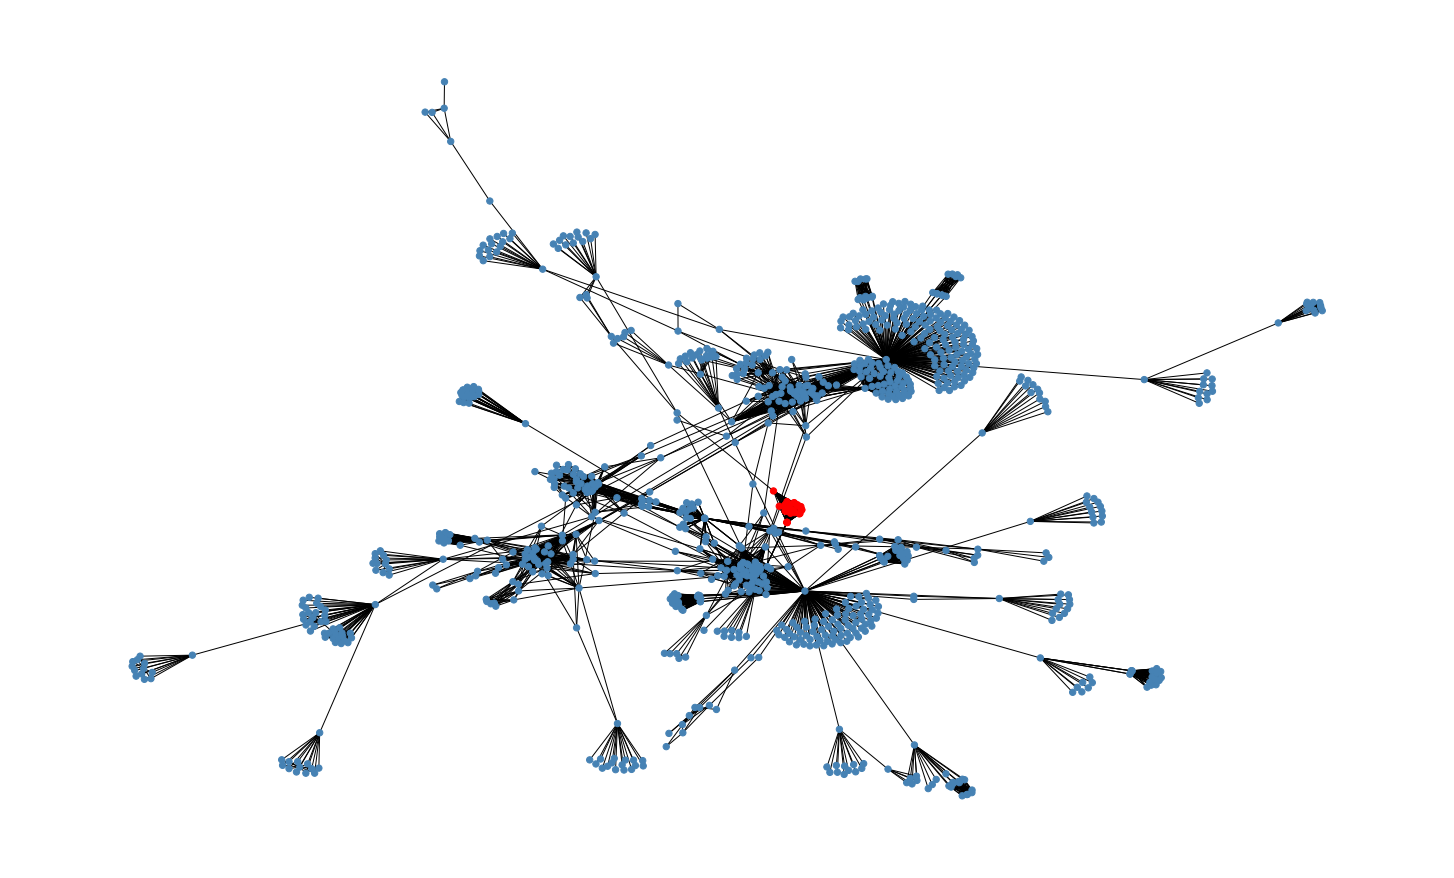

In [16]:
# Where is our ego network ??

color_map = []
for i in list(G.nodes) :
  if i in list(Ego_Network.nodes) : color_map.append ('red')
  else : color_map.append ('steelblue')

fig = plt.figure("Degree of a random graph", figsize=(20,12))  
nx.draw(G, node_color=color_map, with_labels=False ,node_size=40)
plt.show()

In [20]:
# level 2

Ego_Network_level2 = nx.ego_graph (G , '738', radius = 2)
second_level_nodes = list ( filter (lambda x : x not in  list(Ego_Network.nodes) , list(Ego_Network_level2.nodes) ))

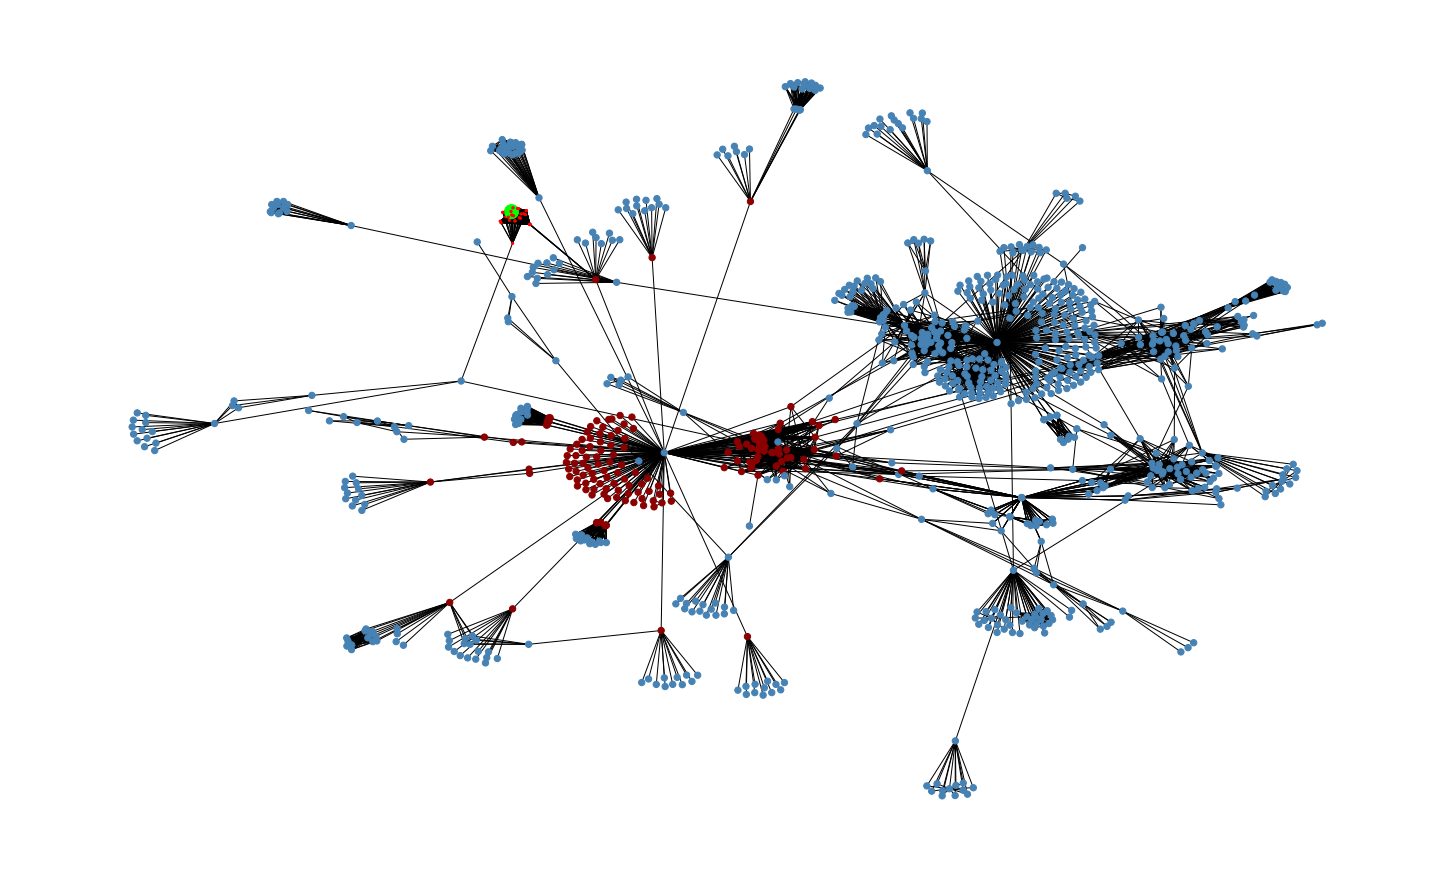

In [75]:
color_map = []
size_node=[]
for i in list(G.nodes) :
  if i == '738' : color_map.append ('lime')
  elif i in list(Ego_Network.nodes) : color_map.append ('red')
  elif i in second_level_nodes : color_map.append ('darkred')
  else : color_map.append ('steelblue')

  if i=='738' : size_node.append(200)
  elif i in list(Ego_Network.nodes) : size_node.append (5)
  else: size_node.append(40)

size_map = []
for i in list(G.nodes) :
  if i== '738' : size_map.append (200)
  else : size_map.append (10)

fig = plt.figure("Degree of a random graph", figsize=(20,12))  
nx.draw(G, node_color=color_map, with_labels=False ,node_size=size_node)
plt.show()

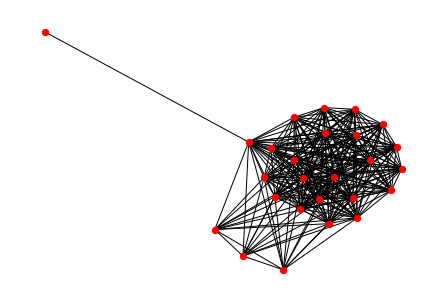

In [60]:
# Ego Network 2

Ego_Network2 = nx.ego_graph ( G , '451')
nx.draw (Ego_Network2 , node_size=40, node_color='red')

In [61]:
Ego_Network2.order()

26

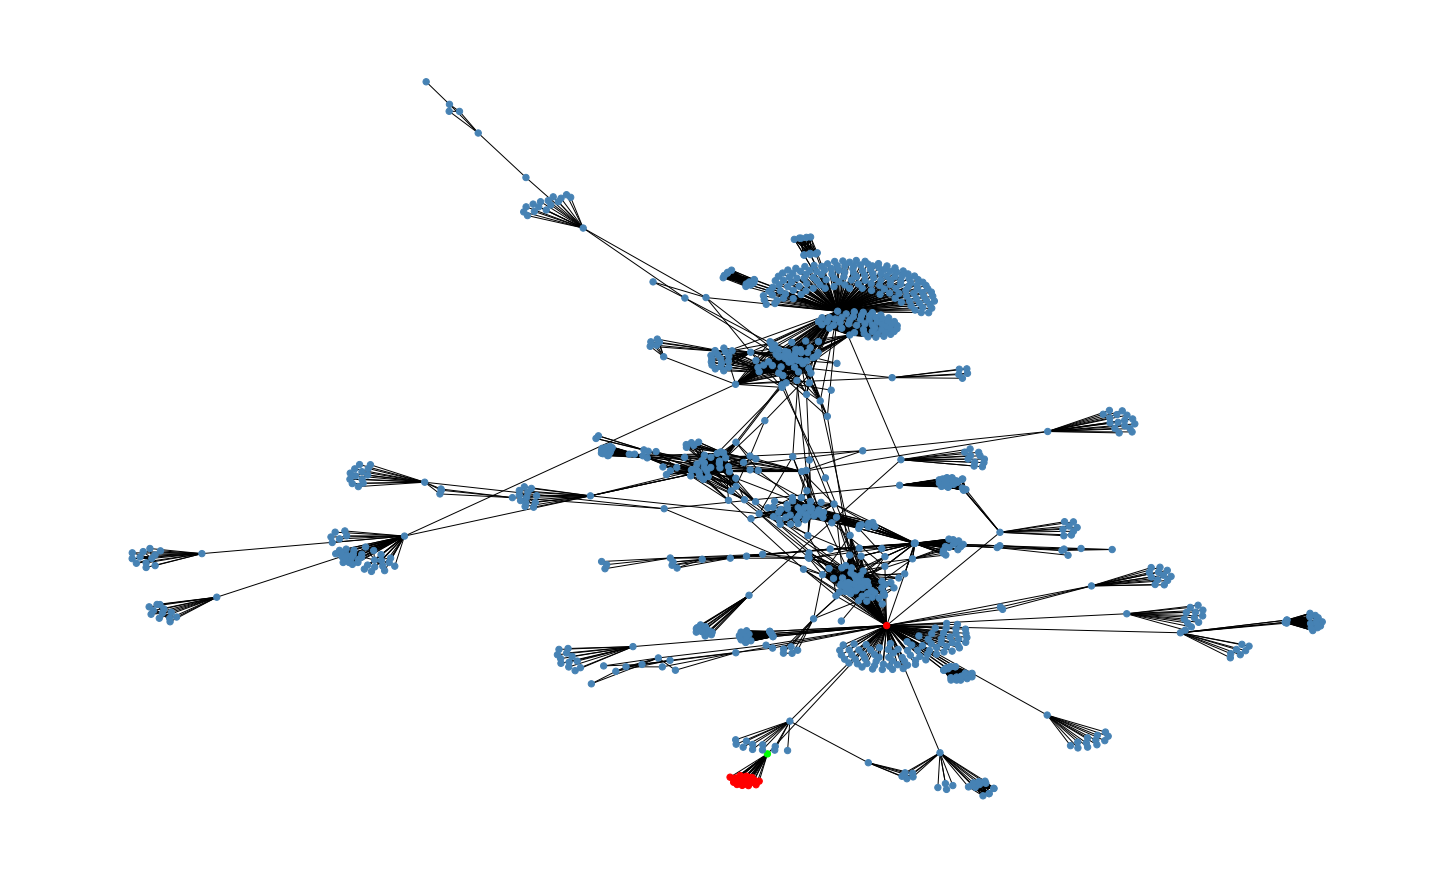

In [52]:
# Where is our ego network ??

color_map = []
for i in list(G.nodes) :
  if i == '451' : color_map.append ('lime')
  elif i in list(Ego_Network2.nodes) : color_map.append ('red')
  else : color_map.append ('steelblue')

fig = plt.figure("Degree of a random graph", figsize=(20,12))  
nx.draw(G, node_color=color_map, with_labels=False ,node_size=40)
plt.show()

In [62]:
# level 2

Ego_Network2_level2 = nx.ego_graph (G , '451', radius = 2)
second_level_nodes2 = list ( filter (lambda x : x not in  list(Ego_Network2.nodes) , list(Ego_Network2_level2.nodes) ))

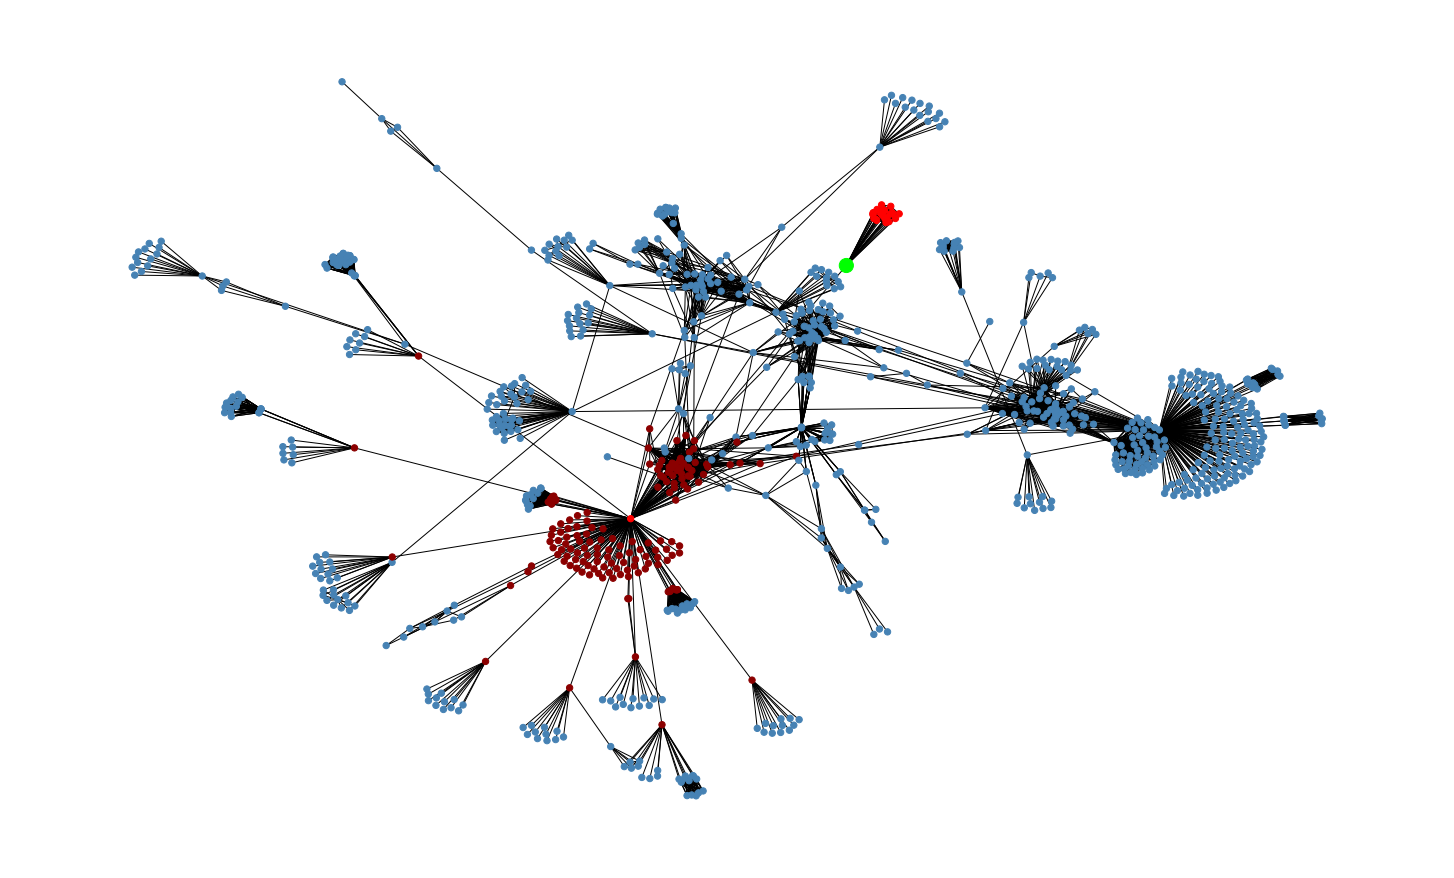

In [55]:
color_map = []
size_map=[]
for i in list(G.nodes) :
  if i == '451' : color_map.append ('lime')
  elif i in list(Ego_Network2.nodes) : color_map.append ('red')
  elif i in second_level_nodes2 : color_map.append ('darkred')
  else : color_map.append ('steelblue')

  if i=='451' : size_map.append(200)
  elif i in list(Ego_Network2.nodes) : size_map.append (40)
  else: size_map.append(40)

  

fig = plt.figure("Degree of a random graph", figsize=(20,12))  
nx.draw(G, node_color=color_map, with_labels=False ,node_size=size_map)
plt.show()

# **تحلیل انتشار تبلیغات برای هر دو گره برای دو مرحله**

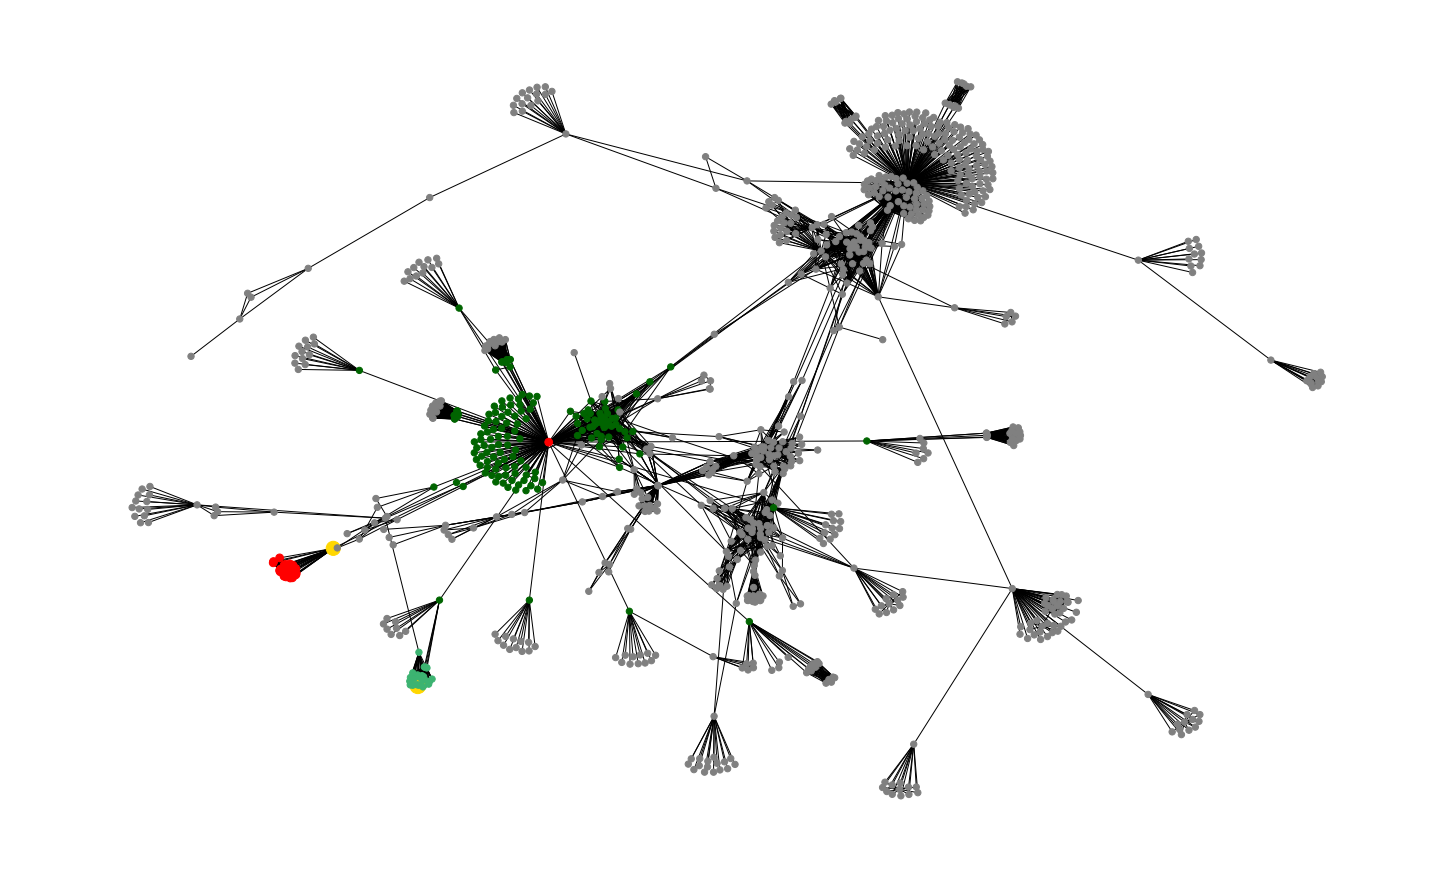

In [82]:
color_map = []
size_node=[]
for i in list(G.nodes) :
  if i == '738' : color_map.append ('gold')
  elif i == '451' : color_map.append ('gold')
  elif i in list(Ego_Network.nodes) : color_map.append ('mediumseagreen')
  elif i in second_level_nodes : color_map.append ('darkgreen')
  elif i in list(Ego_Network2.nodes) : color_map.append ('red')
  elif i in second_level_nodes2 : color_map.append ('darkred')
  else : color_map.append ('grey')

  if i=='738' : size_node.append(250)
  elif i in list(Ego_Network.nodes) : size_node.append (40)
  elif i=='451' : size_node.append(200)
  elif i in list(Ego_Network2.nodes) : size_node.append (60)
  else: size_node.append(40)


fig = plt.figure("Degree of a random graph", figsize=(20,12))  
nx.draw(G, node_color=color_map, with_labels=False ,node_size=size_node)
plt.show()

In [91]:
nx.clustering (G)
sorted_clustering_coefficent = sorted ( nx.clustering (G).items() , key = lambda x : x[1] , reverse = True )
print (sorted_clustering_coefficent)

[('2', 1.0), ('386', 1.0), ('387', 1.0), ('466', 1.0), ('61', 1.0), ('69', 1.0), ('107', 1.0), ('102', 1.0), ('68', 1.0), ('75', 1.0), ('101', 1.0), ('110', 1.0), ('164', 1.0), ('130', 1.0), ('180', 1.0), ('173', 1.0), ('217', 1.0), ('218', 1.0), ('243', 1.0), ('247', 1.0), ('255', 1.0), ('259', 1.0), ('269', 1.0), ('273', 1.0), ('285', 1.0), ('286', 1.0), ('287', 1.0), ('392', 1.0), ('394', 1.0), ('638', 1.0), ('639', 1.0), ('640', 1.0), ('641', 1.0), ('642', 1.0), ('643', 1.0), ('644', 1.0), ('645', 1.0), ('646', 1.0), ('647', 1.0), ('648', 1.0), ('650', 1.0), ('651', 1.0), ('652', 1.0), ('653', 1.0), ('654', 1.0), ('655', 1.0), ('656', 1.0), ('657', 1.0), ('658', 1.0), ('659', 1.0), ('660', 1.0), ('662', 1.0), ('663', 1.0), ('664', 1.0), ('665', 1.0), ('666', 1.0), ('667', 1.0), ('668', 1.0), ('669', 1.0), ('670', 1.0), ('671', 1.0), ('672', 1.0), ('674', 1.0), ('675', 1.0), ('676', 1.0), ('677', 1.0), ('678', 1.0), ('679', 1.0), ('680', 1.0), ('681', 1.0), ('682', 1.0), ('683', 1.0

In [37]:
len (list (filter (lambda x : 0 <= x[1] <= 0.1 , sorted_clustering_coefficent )))

396

In [38]:
sum ([x[1] for x in sorted_clustering_coefficent]) / G.order()

0.37837194546344716

In [86]:
nx.clustering (G , nodes = '738')

0.91005291005291

In [87]:
nx.betweenness_centrality (G) ['738']

1.0997469491850173e-05

In [88]:
transitivity=nx.transitivity(G)
transitivity

0.2938480793299316

In [89]:
density=nx.density(G)
density

0.007576431955530498